### This notebook calculates parameters for ALMA input and interpret result from ALMA output
This notebook has to be run with Python 3.8.10 kernel

In [3]:
# Anyways I can do some caluclations of parameters first or set up a basic script

# Required Resolution
# prob about 0.1 arcsec and maybe smaller
#To calculate

In [4]:
# import casatasks
#https://github.com/aardk/jupyter-casa/blob/master/examples/vla-cont-tutorial.ipynb
#https://colab.research.google.com/github/casangi/examples/blob/master/community/casa6_demo.ipynb#scrollTo=IIr5sp0VgR2m

### There is a sensitivity calculator already

https://almascience.nrao.edu/proposing/sensitivity-calculator


Common Parameters:


Declination:  14h08m10s

Polarisation:  Dual



### Frequency to Wavelength Conversion
| Band | 1 | 3  | 4  | 5  | 6  | 7  | 8  | 9  | 10  |
|----------------|-----|------|------|------|------|------|------|------|------|
| Frequency (GHz) | 40  | 100  | 150  | 185  | 230  | 345  | 460  | 650  | 870  |
| Wavelength (μm) | 7494.81 | 2997.92 | 1998.62 | 1620.50 | 1304.45 | 868.96 | 651.72 | 461.22 | 344.59 |

### Spatial Resolution Formula in Arcseconds

The resolution in arcseconds can be approximated as:

$$
\text{FWHM} (") = \frac{76}{\text{max\_baseline (km)} \times \text{frequency (GHz)}}
$$


### Maximum Recoverable Scale (MRS):

$$
\text{MRS} \approx 0.6 \times \frac{\lambda}{b_{\text{min}}}
$$


<p style="color:blue;">This is a note for the maximum baseline.</p>

In [5]:
# Take the radius of a CPD as 1 au (roughly for a HD168142b by calculating Hll's radius))
# Rmb AU is not parsec-dependent, just stands for Earth-Sun distance

import numpy as np
import pandas as pd
from astropy import units as u
from astropy.constants import au, pc
from tabulate import tabulate

# Convert constants to CGS values
au = au.cgs.value  # Astronomical Unit in cm
pc = pc.cgs.value  # Parsec in cm

# Define the radius of the CPD and the distance to the object
radius_cpd = 2.5 * au  # 1 AU in cm
distance_to_cpd = 100 * pc  # 100 parsecs in cm

# Calculate the angular size in radians (small-angle approximation)
angular_size_rad = radius_cpd / distance_to_cpd  # θ ≈ r / d for small angles

# Convert radians to arcseconds
angular_size_arcsec = (angular_size_rad * u.rad).to(u.arcsec)

print(f"The angular size of the CPD is {angular_size_arcsec:.3f}, or {angular_size_arcsec.to(u.mas):.3f} in mas.")

# Function to create ALMA table with configurations
def create_alma_table():
    """Create a Pandas DataFrame for ALMA configurations C-7 to C-10 with band row"""
    
    # Define columns
    columns = ["Config", "b_max (km)", "40 GHz", "100 GHz", "150 GHz", "185 GHz", 
               "230 GHz", "345 GHz", "460 GHz", "650 GHz", "870 GHz"]
    
    # Data excluding the "Band" row for consistency
    data = [
        ["C-7", 3.6, 0.53, 0.21, 0.14, 0.11, 0.092, 0.061, 0.046, 0.033, 0.024],
        ["C-8", 8.5, 0.24, 0.096, 0.064, 0.052, 0.042, 0.028, 0.021, 0.015, 0.011],
        ["C-9", 13.9, 0.14, 0.057, 0.038, 0.031, 0.025, 0.017, 0.012, 0.0088, 0.0066],
        ["C-10", 16.2, 0.11, 0.042, 0.028, 0.023, 0.018, 0.012, 0.0091, 0.0065, 0.0048]
    ]
    
    # Convert to DataFrame
    df = pd.DataFrame(data, columns=columns)
    
    return df

# Create the ALMA table
df = create_alma_table()

# Store angular resolution values in a universal NumPy array
angular_resolutions = df.iloc[:, 2:].to_numpy()  # Extract only frequency-dependent columns


# Extract individual arrays
C7_res = angular_resolutions[0]  # C-7 values
C8_res = angular_resolutions[1]  # C-8 values
C9_res = angular_resolutions[2]  # C-9 values
C10_res = angular_resolutions[3]  # C-10 values


# Print the DataFrame using tabulate for better formatting
print(tabulate(df, headers='keys', tablefmt='plain'))

#print(tabulate(df, headers='keys', tablefmt='latex'))

# Observational frequency and ALMA Band reference
obs_frequency = 300 * u.GHz  # Observing at 1000 nm
print(f'\nBand2 not available for cycle 11?')
print(f'\nIf I observe at 1000 nm, the frequency is {obs_frequency} (Band 7)')
print(f'Ignoring the maximum recoverable scale as no extended emission observation is being performed.')






The angular size of the CPD is 0.025 arcsec, or 25.000 mas in mas.
    Config      b_max (km)    40 GHz    100 GHz    150 GHz    185 GHz    230 GHz    345 GHz    460 GHz    650 GHz    870 GHz
 0  C-7                3.6      0.53      0.21       0.14       0.11       0.092      0.061     0.046      0.033      0.024
 1  C-8                8.5      0.24      0.096      0.064      0.052      0.042      0.028     0.021      0.015      0.011
 2  C-9               13.9      0.14      0.057      0.038      0.031      0.025      0.017     0.012      0.0088     0.0066
 3  C-10              16.2      0.11      0.042      0.028      0.023      0.018      0.012     0.0091     0.0065     0.0048

Band2 not available for cycle 11?

If I observe at 1000 nm, the frequency is 300.0 GHz (Band 7)
Ignoring the maximum recoverable scale as no extended emission observation is being performed.


In [6]:
# In terms of au
# 1 parsec = 1 AU / 1 arc second
# xau = arcsecond *100

df_times_100 = df.copy()
df_times_100.iloc[:, 2:] = df_times_100.iloc[:, 2:] * 100

# Print the new DataFrame with multiplied values using tabulate for better formatting
print("\nALMA Table with Telescopic Resolutions in AU at 100 pc from Observer:")
print(tabulate(df_times_100, headers='keys', tablefmt='plain'))


ALMA Table with Telescopic Resolutions in AU at 100 pc from Observer:
    Config      b_max (km)    40 GHz    100 GHz    150 GHz    185 GHz    230 GHz    345 GHz    460 GHz    650 GHz    870 GHz
 0  C-7                3.6        53       21         14         11          9.2        6.1       4.6        3.3        2.4
 1  C-8                8.5        24        9.6        6.4        5.2        4.2        2.8       2.1        1.5        1.1
 2  C-9               13.9        14        5.7        3.8        3.1        2.5        1.7       1.2        0.88       0.66
 3  C-10              16.2        11        4.2        2.8        2.3        1.8        1.2       0.91       0.65       0.48


### Noise Level in an Interferometer

The noise level in the resulting data cubes (expressed in mJy) for an interferometer scales as:

$$
\sigma = \frac{k T_{\text{sys}}}{A N^2 \sqrt{N_p \Delta\nu \Delta t}}
$$

where:


$$
\begin{aligned}
\sigma &= \text{Noise level (mJy)} \\
k &= \text{Boltzmann’s constant} \\
T_{\text{sys}} &= \text{System temperature} \\
A &= \text{Area of each antenna} \\
N &= \text{Number of antennas} \\
N_p &= \text{Number of polarizations} \\
\Delta\nu &= \text{Available bandwidth} \\
\Delta t &= \text{Observing time}
\end{aligned}
$$


$$ S_{\text{Jy/beam}} =  S_{\text{Jy/pixel}} \times \frac{\Omega_{\text{beam}}}{\Omega_{\text{pixel}}} $$


### Surface Brightness Sensitivity Formula

The surface brightness sensitivity for non-point source is related to the point-source sensitivity  by:

$$ \sigma_T = \frac{\sigma_S \lambda^2}{2k \Omega} $$

where the beam solid angle is given by:

$$ \Omega = \frac{\pi \theta_{res}^2}{4 \ln 2} $$

where theta is the spatial resolution (FWHM of the beam).



In [7]:
# I want to estimate the noise I need to detect the CPD with a 5 sigma confidence
# Then I can use the ALMA Sensitivity Calculator to estimate the integration time

# Radmc3d(Jy/pixel) to (ALMA)Jy/beam and integrate over the beam and divide the total flux by 5
# The beam is just the angular resolution of the band
# RADMC3d  pixel size is 0.1 arcsec
#  pixel size in arcsec = ( pixel size in cm / 1.496e13) / (distance in parsec)
# pixel size in cm can be found in image.out (4th row)

#######################################################################################################################################################################
# Relevant Pixel/Beam/Arcsecond conversion

#maybe i should use radmc3d.py to convolve the image the gaussian beam (smears out the small structures so no shrp edge)

import radmc3dPy.image as image

# Read the image.out file
img = image.readImage('image.out')

# Get the pixel size
nx = img.nx
ny = img.ny
pixel_size_x_cm = img.sizepix_x  #cm
pixel_size_y_cm = img.sizepix_y #cm


dpc = 100 #distance_to_object_pc

# Print the pixel size
print(f"The image size is {nx} pixels wide and {ny} pixels high.")
print(f"The pixel size is {pixel_size_x_cm} cm in x-direction and {pixel_size_y_cm} cm in y-direction.")


# Convert the pixel size to arcseconds
pixel_size_x_arcsec = ((pixel_size_x_cm / 1.496e13)/ dpc)  #arcsecond
pixel_size_y_arcsec = ((pixel_size_y_cm  / 1.496e13)/ dpc) #arcsecond

print(f"The pixel size is {pixel_size_x_arcsec:0.3f} arcseconds in x-direction and {pixel_size_y_arcsec:0.3f} arcseconds in y-direction.")

# Calculate the beam

beam_radmc = pixel_size_x_arcsec*pixel_size_y_arcsec # radmc3d beam in arcsec^2 
# or just the square area???

# Each band+config has a different beam size
# Need a matrix, how do I represent them so they are convenient when I need a noise level and not make it too messy?
# Start with just 1 configuration -C-10 


beam_ALMA_C10 = np.pi*(C10_res**2)/(4*np.log(2)) # for each band in C10 configuration


bands = [1, 3, 4, 5, 6, 7, 8, 9, 10]  # Correct band numbers


pixels_per_beam = [beam / beam_radmc for beam in beam_ALMA_C10]

# Print the beams in the desired format
print('\n')
print(f"The beam for radmc3d is {beam_radmc:.3e} arcsec^2")
print('\n')
print("For C10 configuration:")
print("Band\tBeam (arcsec^2)\tPixels per Beam")
for band, beam, pixels in zip(bands, beam_ALMA_C10, pixels_per_beam):
    print(f"Band {band}\t\t{beam:.3e}\t\t{pixels:.3f}")

print('\n')

print('For larger Bands, the pixel size is larger than the beam size')

Fast (Fortran90) Mie-scattering module could not be imported. Falling back to the slower Python version.
Reading image.out
The image size is 1000 pixels wide and 1000 pixels high.
The pixel size is 2962038264200.449 cm in x-direction and 2962038264200.449 cm in y-direction.
The pixel size is 0.002 arcseconds in x-direction and 0.002 arcseconds in y-direction.


The beam for radmc3d is 3.920e-06 arcsec^2


For C10 configuration:
Band	Beam (arcsec^2)	Pixels per Beam
Band 1		1.371e-02		3497.290
Band 3		1.999e-03		509.853
Band 4		8.883e-04		226.601
Band 5		5.994e-04		152.898
Band 6		3.671e-04		93.646
Band 7		1.632e-04		41.621
Band 8		9.383e-05		23.935
Band 9		4.787e-05		12.212
Band 10		2.611e-05		6.659


For larger Bands, the pixel size is larger than the beam size


In [8]:
# Get the brightness of CPD outer rim in Jy/pixel * beam_ALMA/beam_radmc

ALMA1621_Jy_pixel = 8.769799660513e-5 # mean brightness over 4 pixels Jy/pixel   

noise = (ALMA1621_Jy_pixel/5)*beam_ALMA_C10[3]/beam_radmc

print(f'The noise level required to detect the CPD with a 5 sigma confidence is {noise:.3e} Jy/beam in Band 5 in config 10')
print(f'6.68853 hours is required')

The noise level required to detect the CPD with a 5 sigma confidence is 2.682e-03 Jy/beam in Band 5 in config 10
6.68853 hours is required


In [9]:
# Compute the mean brightness of the CPD in Jy/pixel for each image
# First, open up CARTA using ./carta-4.0-x86_64.AppImage   in Ubuntu
# Check if all my images have been saved
# Paste the directory to CARTA : /mnt/c/Users/LHEM//Desktop/Van_Code_Projects/Circumplanetary_Disk/CPD_CPDphipi_ne8
# Loaded the FITS, zoom in, and use eclipse, then the calculator (statistics widget)
# Bandwidth Per Polarization: 7.5 GHz should be selected for continuum observations in Bands 1-8 and 15 GHz in Bands 9 and 10. 

#345： 2.150189791931e-3 Jy (13 pixels)
# 461: 1.244547819414e-3  (13 pixels)
# 652: 	6.264223428354e-4 (13 pixels)
# 870: 2.314354818996e-4 (
# 1304: 5.111429471491e-5
# 1621： 2.984055981869e-5
# 2000： 1.390077620402e-5
# 3000： 3.617939506958e-6 
# 7500：1.101337660728e-7

#calculate the beam sizes

beam_ALMA_C9 = np.pi*(C9_res**2)/(4*np.log(2)) 
beam_ALMA_C8 = np.pi*(C8_res**2)/(4*np.log(2)) 
beam_ALMA_C7 = np.pi*(C7_res**2)/(4*np.log(2)) 

# Organise the data into a dictionary

#  2.039726819593e-10 (230 pixels) , 1.764532198973e-8 (230)

data = {
    "Sky coordinates":  ["14h08m10s"]*9,
    "Polarisation":  ["Dual"]*9,
    "Bandwidth per Polarization": ["7.5 GHz"]*6 + ["15 GHz"]*3,
    "Column Density" : ["0.913mm (3rd Octile)"]*9,
    "Resolution_C10 (arcsecond)": C10_res, # for each band
    "Resolution_C9 (arcsecond)": C9_res, # for each band
    "Resolution_C8 (arcsecond)": C8_res, # for each band
    "Resolution_C7 (arcsecond)": C7_res, # for each band
    "Band": [1, 3, 4, 5, 6, 7, 8, 9, 10],
    "Wavelength (GHz)": [ 40,100,150,185,230,345,460,650,870 ],
    "Wavelength (micron)": [7494.81, 2997.92,1998.62, 1620.50,1304.45, 868.96, 651.72, 461.22, 344.59],
    "Brightness (Jy/pixel)": [b/100 for b in (7.2317e-09, 3.01507e-07, 1.9472e-06, 5.86042e-06, 1.87215e-05, 1.79528e-04, 3.87107e-04, 6.63578e-04, 1.064588e-03)],  #nx and ny
    "beam_ALMA_C10 (arcsec^2)": beam_ALMA_C10,
    "beam_ALMA_C9 (arcsec^2)": beam_ALMA_C9,
    "beam_ALMA_C8 (arcsec^2)": beam_ALMA_C8,
    "beam_ALMA_C7 (arcsec^2)": beam_ALMA_C7,
}

# What else do I need in the dictionary? 
# beam of all bands in the few configurations


# Calculate the noise level
noise_C10 = [f"{(b / 5) * beam / beam_radmc:.3e}"for b, beam in zip(data["Brightness (Jy/pixel)"], data["beam_ALMA_C10 (arcsec^2)"])]
noise_C9 = [f"{(b / 5) * beam / beam_radmc:.3e}" for b, beam in zip(data["Brightness (Jy/pixel)"], data["beam_ALMA_C9 (arcsec^2)"])]
noise_C8 = [f"{(b / 5) * beam / beam_radmc:.3e}" for b, beam in zip(data["Brightness (Jy/pixel)"], data["beam_ALMA_C8 (arcsec^2)"])]
noise_C7 = [f"{(b / 5) * beam / beam_radmc:.3e}" for b, beam in zip(data["Brightness (Jy/pixel)"], data["beam_ALMA_C7 (arcsec^2)"])]

# Add the noise levels to the dictionary
data["Noise_C10 (Jy/beam)"] = noise_C10
data["Noise_C9 (Jy/beam)"] = noise_C9
data["Noise_C8 (Jy/beam)"] = noise_C8
data["Noise_C7 (Jy/beam)"] = noise_C7

In [10]:
import pandas as pd

# Create a DataFrame from the dictionary
df = pd.DataFrame(data)

# Select specific columns to include in the table
selected_columns = ["Band", "Wavelength (GHz)", "Noise_C10 (Jy/beam)","Resolution_C10 (arcsecond)", "Noise_C9 (Jy/beam)","Resolution_C9 (arcsecond)", "Noise_C8 (Jy/beam)","Resolution_C8 (arcsecond)", "Noise_C7 (Jy/beam)","Resolution_C7 (arcsecond)"]
df_selected = df[selected_columns]

# Display the selected columns of the DataFrame
print(df_selected)

   Band  Wavelength (GHz) Noise_C10 (Jy/beam)  Resolution_C10 (arcsecond)  \
0     1                40           5.058e-08                      0.1100   
1     3               100           3.074e-07                      0.0420   
2     4               150           8.825e-07                      0.0280   
3     5               185           1.792e-06                      0.0230   
4     6               230           3.506e-06                      0.0180   
5     7               345           1.494e-05                      0.0120   
6     8               460           1.853e-05                      0.0091   
7     9               650           1.621e-05                      0.0065   
8    10               870           1.418e-05                      0.0048   

  Noise_C9 (Jy/beam)  Resolution_C9 (arcsecond) Noise_C8 (Jy/beam)  \
0          8.194e-08                     0.1400          2.408e-07   
1          5.663e-07                     0.0570          1.606e-06   
2          1.625e-0

In [11]:
# Calculate the integration time 
# Website of the ALMA Sensitivity Calculator: https://almascience.eso.org/proposing/sensitivity-calculator
# Bandwidth per polarisation is very important
# Each config evey wavelength 1 value for time
# start from the smallest frequency
# time_C10 = [3.07728 d, 4.72113 h, 1.888 h, 3.93396 d, 1.42565 h , 1.41435 h  ,  7.03288 h , 4.03182 d , 26.3272 d]
# time_C9 =[28.1364h,1.3915 h, 33.41322 min, 28.59817 h, 22.97882 min , 21.06191 min  , 2.32672 h , 28.81335 h , 7.3674 d ]
#time_C8 =[3.25894 h, 10.38128 min, 4.15125 min, 3.61402 h, 2.88571 min,  2.86069 min , 14.88085 min , 3.41166 h , 22.91217 h ]
# time_C7 = [8.22458 min, 27.19076 s, 10.87488s, 10.82963 min , 7.51944 s ,  7.6219 s , 38.78864 s , 8.74044 min , 60.67481 min]

# Convert to second and store in data

import math


def round_to_10(x):
    return int(math.ceil(x / 10.0)) * 10


# Define the function to convert time to seconds and round up to the nearest integer
def convert_to_seconds(time_list):
    converted_times = []
    for time in time_list:
        if 'd' in time:
            seconds = float(time.replace('d', '').strip()) * 86400  # Convert days to seconds
        elif 'h' in time:
            seconds = float(time.replace('h', '').strip()) * 3600  # Convert hours to seconds
        elif 'min' in time:
            seconds = float(time.replace('min', '').strip()) * 60  # Convert minutes to seconds
        elif 's' in time:
            seconds = float(time.replace('s', '').strip())  # Seconds
        else:
            raise ValueError("Unknown time format")
        converted_times.append(round_to_10(seconds))  # Round up to the nearest multiple of 10
    return converted_times

# Define the times for each configuration in different units
time_C10 = ["3.07728 d", "4.72113 h", "1.888 h", "3.93396 d", "1.42565 h", "1.41435 h", "7.03288 h", "4.03182 d", "26.3272 d"]
time_C9 = ["28.1364 h", "1.3915 h", "33.41322 min", "28.59817 h", "22.97882 min", "21.06191 min", "2.32672 h", "28.81335 h", "7.3674 d"]
time_C8 = ["3.25894 h", "10.38128 min", "4.15125 min", "3.61402 h", "2.88571 min", "2.86069 min", "14.88085 min", "3.41166 h", "22.91217 h"]
time_C7 = ["8.22458 min", "27.19076 s", "10.87488 s", "10.82963 min", "7.51944 s", "7.6219 s", "38.78864 s", "8.74044 min", "60.67481 min"]

# Convert times to seconds and round up to the nearest integer
time_C10_seconds = convert_to_seconds(time_C10)
time_C9_seconds = convert_to_seconds(time_C9)
time_C8_seconds = convert_to_seconds(time_C8)
time_C7_seconds = convert_to_seconds(time_C7)

print(time_C10_seconds)
data["Time_C10 (s)"] = time_C10_seconds
data["Time_C9 (s)"] = time_C9_seconds
data["Time_C8 (s)"] = time_C8_seconds
data["Time_C7 (s)"] = time_C7_seconds


# Create a DataFrame from the dictionary
df = pd.DataFrame(data)

# Select specific columns to include in the table
selected_columns_time = ["Band", "Wavelength (GHz)","Time_C10 (s)","Time_C9 (s)","Time_C8 (s)","Time_C7 (s)" ]
df_selected_time = df[selected_columns_time]

# Display the selected columns of the DataFrame
print(df_selected_time)




[265880, 17000, 6800, 339900, 5140, 5100, 25320, 348350, 2274680]
   Band  Wavelength (GHz)  Time_C10 (s)  Time_C9 (s)  Time_C8 (s)  Time_C7 (s)
0     1                40        265880       101300        11740          500
1     3               100         17000         5010          630           30
2     4               150          6800         2010          250           20
3     5               185        339900       102960        13020          650
4     6               230          5140         1380          180           10
5     7               345          5100         1270          180           10
6     8               460         25320         8380          900           40
7     9               650        348350       103730        12290          530
8    10               870       2274680       636550        82490         3650


In [12]:
#  Make a table of sensitivity levels for each band and configuration
# 1st column： 1 sigma in Jy/beam
# 2nd column: integration time
# 3rd column: Band
# 4th column: Configuration
# 5th column: number

def get_alma_data():
    return data

In [13]:
# Now I want to define a code that helps me  run a set of observation in casa
# need to create folders, allocate images in it.. 
print(df)

  Sky coordinates Polarisation Bandwidth per Polarization  \
0       14h08m10s         Dual                    7.5 GHz   
1       14h08m10s         Dual                    7.5 GHz   
2       14h08m10s         Dual                    7.5 GHz   
3       14h08m10s         Dual                    7.5 GHz   
4       14h08m10s         Dual                    7.5 GHz   
5       14h08m10s         Dual                    7.5 GHz   
6       14h08m10s         Dual                     15 GHz   
7       14h08m10s         Dual                     15 GHz   
8       14h08m10s         Dual                     15 GHz   

         Column Density  Resolution_C10 (arcsecond)  \
0  0.913mm (3rd Octile)                      0.1100   
1  0.913mm (3rd Octile)                      0.0420   
2  0.913mm (3rd Octile)                      0.0280   
3  0.913mm (3rd Octile)                      0.0230   
4  0.913mm (3rd Octile)                      0.0180   
5  0.913mm (3rd Octile)                      0.0120   
6  0

In [14]:
import pprint

# Print the dictionary in a readable format
pprint.pprint(data)

{'Band': [1, 3, 4, 5, 6, 7, 8, 9, 10],
 'Bandwidth per Polarization': ['7.5 GHz',
                                '7.5 GHz',
                                '7.5 GHz',
                                '7.5 GHz',
                                '7.5 GHz',
                                '7.5 GHz',
                                '15 GHz',
                                '15 GHz',
                                '15 GHz'],
 'Brightness (Jy/pixel)': [7.2317e-11,
                           3.0150699999999996e-09,
                           1.9472e-08,
                           5.8604200000000004e-08,
                           1.87215e-07,
                           1.79528e-06,
                           3.87107e-06,
                           6.6357799999999995e-06,
                           1.064588e-05],
 'Column Density': ['0.913mm (3rd Octile)',
                    '0.913mm (3rd Octile)',
                    '0.913mm (3rd Octile)',
                    '0.913mm (3rd Octile)',
       

In [15]:
import os
print(os.getcwd())


c:\Users\LHEM\Desktop\Van_Code_Projects\Circumplanetary_Disk\CPD_phixyz2_1


### CASA Simobserve parameters


#### Blackbody curve

$$
B(\lambda, T) = \frac{2hc^2}{\lambda^5} \cdot \frac{1}{e^{\frac{hc}{\lambda k T}} - 1}
$$


$$
B(\nu, T) = \frac{2h\nu^3}{c^2} \cdot \frac{1}{e^{\frac{h\nu}{kT}} - 1}
$$


In [16]:
# plot the opacity file
# use pwv - 0.8 as it lies somewhere between ALMA2nd and 3rd octile, representing a realistically ideal observation
import matplotlib.pyplot as plt
from scipy.constants import h, c, k

file_path = 'C:/Users/LHEM/Desktop/Van_Code_Projects/Circumplanetary_Disk/CPD_simple_1_test__planet_refine/apex_transmission.data'
# Load the data from the file
data = np.loadtxt(file_path, comments='#', skiprows=5)

c = 2.99792458e8    # Speed of light in m/s

def planck_frequency(frequency, temperature):
    """
    Calculate the spectral radiance of a blackbody at a given temperature.
    
    Parameters:
    frequency (array-like): Frequencies in GHz.
    temperature (array-like): Temperatures in Kelvin.
    
    Returns:
    np.ndarray: Spectral radiance values.
    """
    # Convert frequency from GHz to Hz
    frequency_hz = frequency * 1e9
    
    # Initialize the list to store spectral radiance values
    BBR = []
    
    # Calculate the spectral radiance using Planck's law for each temperature
    for T in temperature:
        exponent = (h * frequency_hz) / (k * T)
        BBR0 = ((2 * h * frequency_hz**3) / (c**2)) * (1 / (np.exp(exponent) - 1))
        BBR.append(BBR0)
    
    return np.array(BBR)

# Example usage
temperatures = [20, 50, 100, 150]
frequency = data[:, 0]

print(np.shape(frequency))
print(np.shape(temperatures))
print(planck_frequency(frequency, temperatures))
print(np.shape(planck_frequency(frequency, temperatures)))

(7501,)
(4,)
[[1.91508334e-16 1.91675059e-16 1.91841831e-16 ... 1.44084400e-15
  1.44091391e-15 1.44098378e-15]
 [5.57377600e-16 5.57907485e-16 5.58437593e-16 ... 8.48796977e-15
  8.48928868e-15 8.49060760e-15]
 [1.17090676e-15 1.17204938e-15 1.17319253e-15 ... 2.18776188e-14
  2.18816610e-14 2.18857034e-14]
 [1.78506402e-15 1.78682064e-15 1.78857810e-15 ... 3.55769897e-14
  3.55838835e-14 3.55907779e-14]]
(4, 7501)


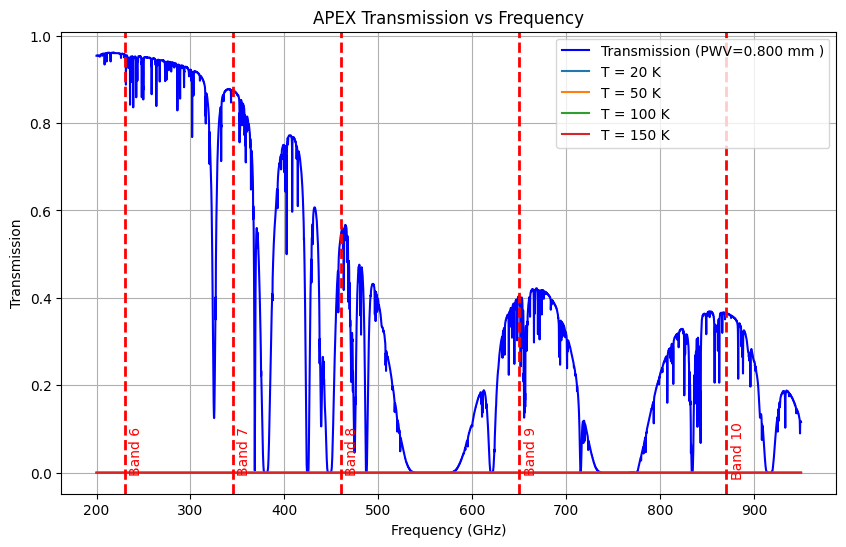

In [17]:


# Extract the first column (frequency) and the third column (transmission for PWV=0.8)
frequency = data[:, 0]
transmission = data[:, 2]


Bandfrequencies = [230, 345, 460, 650, 870]
Bandname=['Band 6', 'Band 7', 'Band 8', 'Band 9', 'Band 10']



plt.figure(figsize=(10, 6))
plt.plot(frequency, transmission, label='Transmission (PWV=0.800 mm )', color='blue')
radiance = planck_frequency(frequency, temperatures)
num_temperatures = radiance.shape[0]

for i in range(num_temperatures):
    plt.plot(frequency, radiance[i, :], label=f'T = {temperatures[i]} K')
    #plt.plot(frequency, radiance[i, :] * transmission, linestyle='--')
    
for freq, name in zip(Bandfrequencies, Bandname):
    plt.axvline(x=freq, color='red', linestyle='--', linewidth=2)
    plt.annotate(name, xy=(freq, 0.5), xytext=(freq + 5, 0.05),
                 rotation=90, verticalalignment='center', color='red')
    

plt.xlabel('Frequency (GHz)')
plt.ylabel('Transmission')
plt.title('APEX Transmission vs Frequency')
#plt.ylim(0, 3)
plt.legend()
plt.grid(True)
plt.show()

#radmc3d sed incl 0 phi 0 zoomau -2 -1 -0.5 0.5  zoom in region CPD SED
# temperature euqation just relate to T star,  planet, and accretion


# temperature range of equation
#below 1500 K (dust sublimation) for satellite formation
# from 10K to 1000K...? cuz the CPD has very steep temperature gradient depending on the distance from the planet



# Find the lambda range of each Temperature
#https://www.hamamatsu.com/us/en/resources/interactive-tools/black-body-curves.html


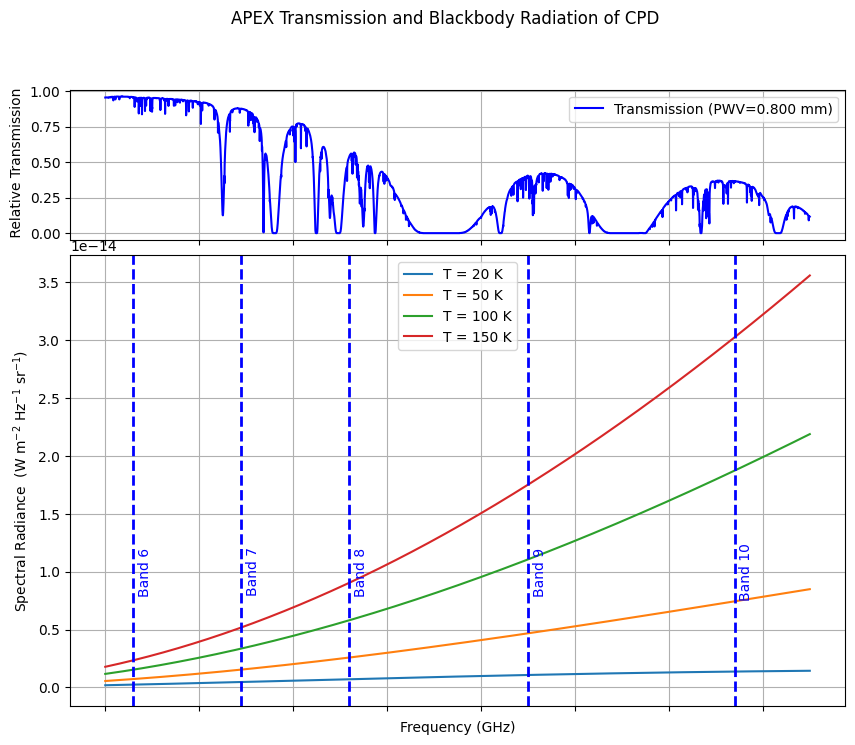

I think this demonstrates how atmospheric absorption reduces transmission at higher frequencies. 
However, for typical CPD temperatures, radiation increases at high frequencies, creating 
a competition between the two factors.


In [18]:
# Create figure and gridspec
fig = plt.figure(figsize=(10, 8))
gs = fig.add_gridspec(2, 1, height_ratios=[1, 3], hspace=0.05)

# Upper plot (transmission)
ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(frequency, transmission, label='Transmission (PWV=0.800 mm)', color='blue')
ax1.set_ylabel(' Relative Transmission')
ax1.legend()
ax1.grid(True)
ax1.set_xticklabels([])  # Hide x-axis labels for the upper plot

# Lower plot (blackbody radiation curves)
ax2 = fig.add_subplot(gs[1, 0], sharex=ax1)
for i in range(num_temperatures):
    ax2.plot(frequency, radiance[i, :], label=f'T = {temperatures[i]} K')
    # ax2.plot(frequency, radiance[i, :] * transmission, linestyle='--')

for freq, name in zip(Bandfrequencies, Bandname):
    ax2.axvline(x=freq, color='blue', linestyle='--', linewidth=2)
    ax2.annotate(name, xy=(freq, 1e-14), xytext=(freq + 5, 1e-14),
                 rotation=90, verticalalignment='center', color='blue')

ax2.set_xlabel('Frequency (GHz)')
ax2.set_ylabel('Spectral Radiance  (W m$^{-2}$ Hz$^{-1}$ sr$^{-1}$)')
ax2.legend()
ax2.grid(True)

plt.suptitle('APEX Transmission and Blackbody Radiation of CPD')
plt.show()


print(f'I think this demonstrates how atmospheric absorption reduces transmission at higher frequencies. \nHowever, for typical CPD temperatures, radiation increases at high frequencies, creating \na competition between the two factors.')

In [19]:
# Use Wiens law to identify peak wavelength in GHz for each CPD characteris temperature

def wiens_law_frequency(T):
    """
    Calculates the peak frequency (GHz) of blackbody radiation using Wien's Law.

    Parameters:
        T (float): Temperature in Kelvin.

    Returns:
        float: Peak frequency in GHz.
    """
    b = 2.897e-3  # Wien's displacement constant (m·K)
    c = 3.0e8  # Speed of light (m/s)
    
    lam_max = b/T  # Peak frequency in meters
    nu_max = c / lam_max  # Convert to frequency
    nu_max_GHz = nu_max / 1e9  # Convert to GHz
    
    return nu_max_GHz

# Example usage:

print(f'For a Blackbody Radiation:')
for temp in temperatures: 
    print(f"Peak frequency for {temp} K : {wiens_law_frequency(temp):.2f} GHz")
    print('\n')


For a Blackbody Radiation:
Peak frequency for 20 K : 2071.11 GHz


Peak frequency for 50 K : 5177.77 GHz


Peak frequency for 100 K : 10355.54 GHz


Peak frequency for 150 K : 15533.31 GHz




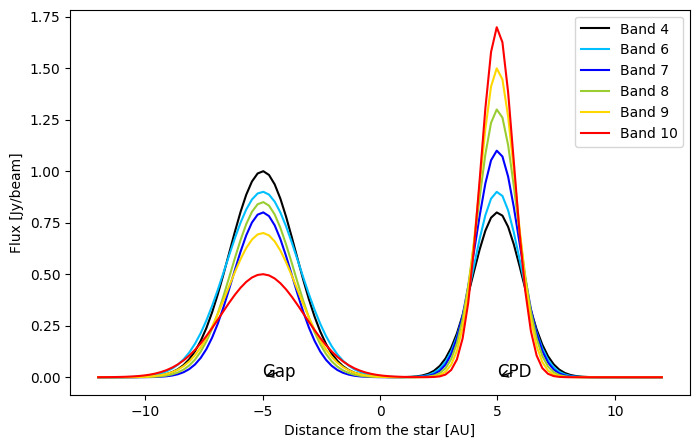

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Simulating distance data (from -12 AU to 12 AU)
distance = np.linspace(-12, 12, 100)

# Simulating flux for different bands (randomized data mimicking the trend)
flux_band4 = np.exp(-((distance+5)/2)**2) + np.exp(-((distance-5)/1.5)**2) * 0.8
flux_band6 = np.exp(-((distance+5)/2.2)**2) * 0.9 + np.exp(-((distance-5)/1.4)**2) * 0.9
flux_band7 = np.exp(-((distance+5)/1.8)**2) * 0.8 + np.exp(-((distance-5)/1.3)**2) * 1.1
flux_band8 = np.exp(-((distance+5)/1.9)**2) * 0.85 + np.exp(-((distance-5)/1.2)**2) * 1.3
flux_band9 = np.exp(-((distance+5)/2.1)**2) * 0.7 + np.exp(-((distance-5)/1.1)**2) * 1.5
flux_band10 = np.exp(-((distance+5)/2.5)**2) * 0.5 + np.exp(-((distance-5)/1.0)**2) * 1.7

# Colors matching the original plot
colors = ['black', 'deepskyblue', 'blue', 'yellowgreen', 'gold', 'red']

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(distance, flux_band4, color=colors[0], label="Band 4")
plt.plot(distance, flux_band6, color=colors[1], label="Band 6")
plt.plot(distance, flux_band7, color=colors[2], label="Band 7")
plt.plot(distance, flux_band8, color=colors[3], label="Band 8")
plt.plot(distance, flux_band9, color=colors[4], label="Band 9")
plt.plot(distance, flux_band10, color=colors[5], label="Band 10")

# Labels and annotations
plt.xlabel("Distance from the star [AU]")
plt.ylabel("Flux [Jy/beam]")
plt.legend()


# Annotating Gap and CPD
plt.annotate("Gap", xy=(-5, 0.0008), xytext=(-5, 0.0011),
             arrowprops=dict(arrowstyle="->"), fontsize=12)
plt.annotate("CPD", xy=(5, 0.0015), xytext=(5, 0.0018),
             arrowprops=dict(arrowstyle="->"), fontsize=12)

# Show plot
plt.show()

In [21]:
# Import the tsv files

import pandas as pd



# Skip comment lines starting with #
# Read each TSV file individually
#df_c10_36000 = pd.read_csv('C10_6_36000.tsv', sep='\t', comment='#', names=['Offset', 'Jy/beam'])
#df_c9_36000  = pd.read_csv('C9_6_36000.tsv', sep='\t', comment='#', names=['Offset', 'Jy/beam'])
#df_c8_36000  = pd.read_csv('C8_6_36000.tsv', sep='\t', comment='#', names=['Offset', 'Jy/beam'])


# 10800s


df_b7_10800_c10  = pd.read_csv('C10_7_10800.tsv', sep='\t', comment='#', names=['Offset', 'Jy/beam'])
df_b6_10800_c10  = pd.read_csv('C10_6_10800.tsv', sep='\t', comment='#', names=['Offset', 'Jy/beam'])
df_b4_10800_c10  = pd.read_csv('C10_4_10800.tsv', sep='\t', comment='#', names=['Offset', 'Jy/beam'])
df_b3_10800_c10  = pd.read_csv('C10_3_10800.tsv', sep='\t', comment='#', names=['Offset', 'Jy/beam'])




# 36000s


df_b7_36000_c10  = pd.read_csv('C10_7_36000.tsv', sep='\t', comment='#', names=['Offset', 'Jy/beam'])
df_b6_36000_c10  = pd.read_csv('C10_6_36000.tsv', sep='\t', comment='#', names=['Offset', 'Jy/beam'])
df_b4_36000_c10  = pd.read_csv('C10_4_36000.tsv', sep='\t', comment='#', names=['Offset', 'Jy/beam'])
df_b3_36000_c10  = pd.read_csv('C10_3_36000.tsv', sep='\t', comment='#', names=['Offset', 'Jy/beam'])



# 36000s (1st octile)
df_b10_36000_pwv1_c10 = pd.read_csv('C10_6_36000_pwv1.tsv', sep='\t', comment='#', names=['Offset', 'Jy/beam'])
df_b9_36000_pwv1_c10 = pd.read_csv('C10_9_36000_pwv1.tsv', sep='\t', comment='#', names=['Offset', 'Jy/beam'])
df_b8_36000_pwv1_c10 = pd.read_csv('C10_8_36000_pwv1.tsv', sep='\t', comment='#', names=['Offset', 'Jy/beam'])
df_b7_36000_pwv1_c10 = pd.read_csv('C10_7_36000_pwv1.tsv', sep='\t', comment='#', names=['Offset', 'Jy/beam'])
df_b6_36000_pwv1_c10 = pd.read_csv('C10_6_36000_pwv1.tsv', sep='\t', comment='#', names=['Offset', 'Jy/beam'])
df_b5_36000_pwv1_c10 = pd.read_csv('C10_5_36000_pwv1.tsv', sep='\t', comment='#', names=['Offset', 'Jy/beam'])
df_b4_36000_pwv1_c10 = pd.read_csv('C10_4_36000_pwv1.tsv', sep='\t', comment='#', names=['Offset', 'Jy/beam'])
df_b3_36000_pwv1_c10 = pd.read_csv('C10_3_36000_pwv1.tsv', sep='\t', comment='#', names=['Offset', 'Jy/beam'])



C:\Users\LHEM\AppData\Local\Temp\ipykernel_20896\280025168.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('coolwarm', len(bands))  # Get N evenly spaced colors


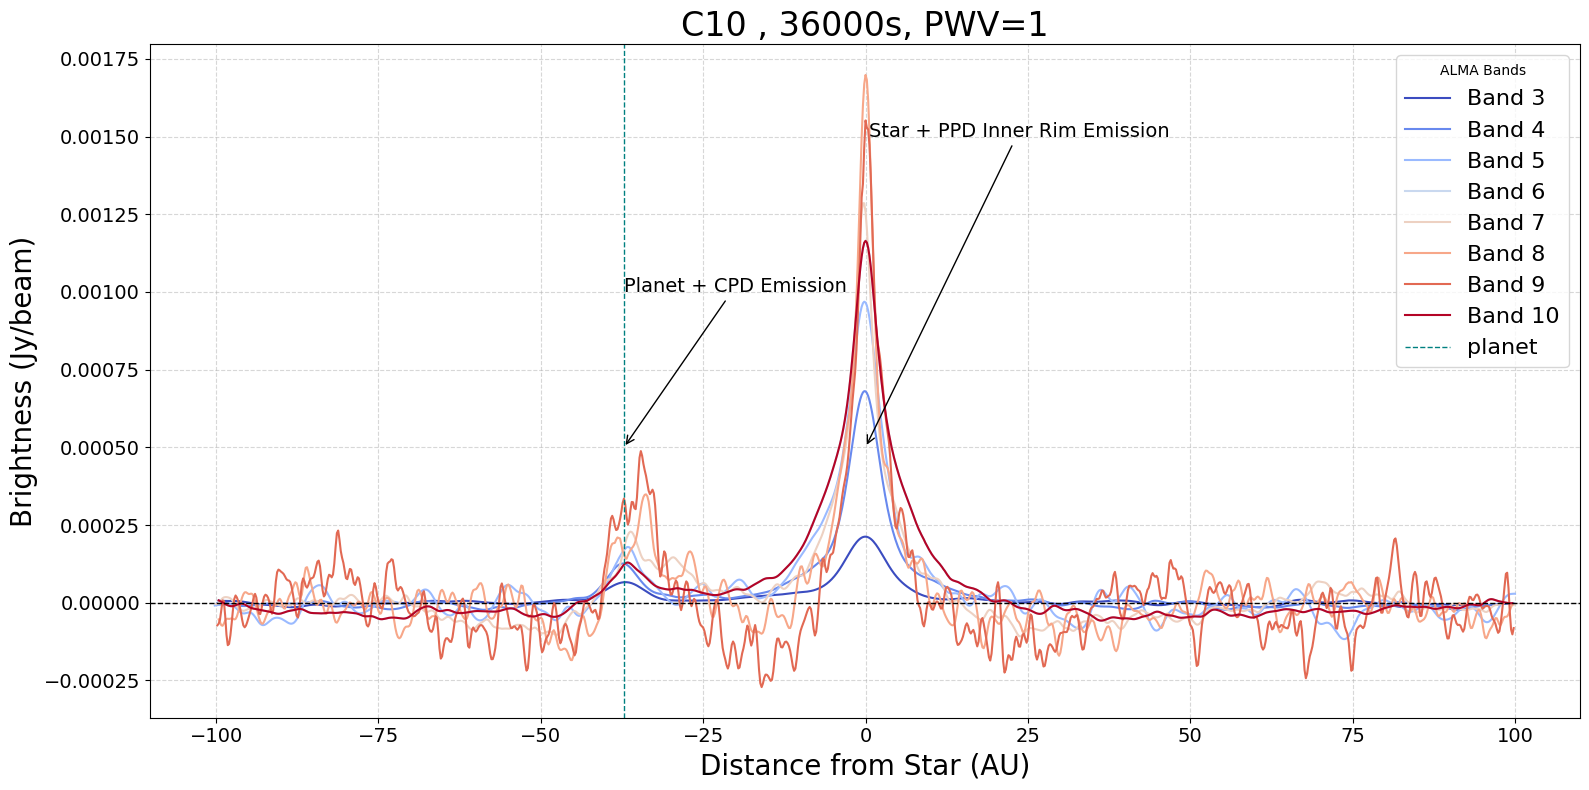

In [22]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
bands = [3, 4, 5, 6, 7, 8, 9, 10]

# how to go from offset to distance in AU?
# 1 arcsec = 1 AU / 1 parsec


dfs = [
    df_b3_36000_pwv1_c10,
    df_b4_36000_pwv1_c10,
    df_b5_36000_pwv1_c10,
    df_b6_36000_pwv1_c10,
    df_b7_36000_pwv1_c10,
    df_b8_36000_pwv1_c10,
    df_b9_36000_pwv1_c10,
    df_b10_36000_pwv1_c10
]

# Choose a colormap — options: viridis, plasma, inferno, magma, cividis, turbo, etc.
cmap = cm.get_cmap('coolwarm', len(bands))  # Get N evenly spaced colors

plt.figure(figsize=(16, 8))

for i, (band, df) in enumerate(zip(bands, dfs)):
    color = cmap(i)  # Get the i-th color from the colormap
    plt.plot(df['Offset']*100, df['Jy/beam'], label=f'Band {band}', color=color)


plt.annotate(
    'Planet + CPD Emission', 
    xy=(-37.2, 0.0005),  # Coordinates of the arrow tip
    xytext=(-37.2, 0.001),  # Coordinates of the text
    arrowprops=dict(facecolor='black', arrowstyle='->'), 
    fontsize=14
)

plt.annotate(
    'Star + PPD Inner Rim Emission', 
    xy=(0, 0.0005),  # Coordinates of the arrow tip
    xytext=(0.5, 0.0015),  # Coordinates of the text
    arrowprops=dict(facecolor='black', arrowstyle='->'), 
    fontsize=14
)

plt.xlabel('Distance from Star (AU)', fontsize=20)
plt.ylabel('Brightness (Jy/beam)', fontsize=20)
plt.title('C10 , 36000s, PWV=1', fontsize=24)
# Increase tick label font size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.grid(True, ls='--', alpha=0.5)
plt.axhline(y=0, color='k', linestyle='--', linewidth=1)  # Add horizontal line at y=0
plt.axvline(x=-37.2, color='teal', linestyle='--', linewidth=1, label='planet')  # Add vertical line at x=0

plt.legend(title="ALMA Bands", fontsize=16, loc='upper right')
plt.tight_layout()
plt.show()

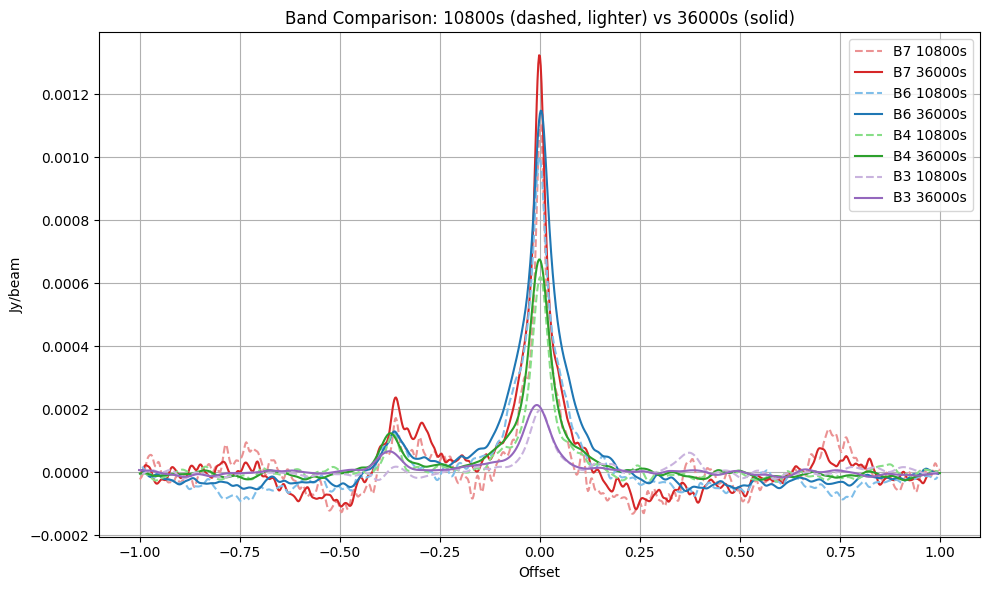

In [23]:
import matplotlib.pyplot as plt


colors = {
    'b7': 'tab:red',
    'b6': 'tab:blue',
    'b4': 'tab:green',
    'b3': 'tab:purple'
}


def lighten_color(color, amount=0.5):
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    lighter = colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])
    return lighter


plt.figure(figsize=(10, 6))


bands = ['b7', 'b6', 'b4', 'b3']
for band in bands:
    color = colors[band]
    lighter_color = lighten_color(color, 0.5)
    
    df_10800 = eval(f'df_{band}_10800_c10')
    df_36000 = eval(f'df_{band}_36000_c10')

    plt.plot(df_10800['Offset'], df_10800['Jy/beam'], linestyle='--', color=lighter_color, label=f'{band.upper()} 10800s')
    plt.plot(df_36000['Offset'], df_36000['Jy/beam'], linestyle='-', color=color, label=f'{band.upper()} 36000s')


plt.xlabel('Offset')
plt.ylabel('Jy/beam')
plt.title('Band Comparison: 10800s (dashed, lighter) vs 36000s (solid)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [53]:
# Fit gaussians to each of the 36000 pwv 1 data
from scipy.optimize import curve_fit



# Extract the CPD line area with where 32 < x < 42 for all bands in dfs
def extract_cpd_area(df, lower_bound, upper_bound):
    # Filter the DataFrame based on the given bounds
    filtered_df = df[(df['Offset']*100 > lower_bound) & (df['Offset']*100 < upper_bound)]
    
    # Extract the relevant data
    x_data = filtered_df['Offset'].values
    y_data = filtered_df['Jy/beam'].values
    
    return x_data, y_data



# Define a Gaussian fit function
def gaussian(x, amp, mean, stddev):
    return amp * np.exp(-((x - mean) ** 2) / (2 * stddev ** 2))

# Define a function to fit a Gaussian to the data
def fit_gaussian(x, y):
    # Initial guess for the parameters: amplitude, mean, standard deviation
    initial_guess = [max(y), np.mean(x), np.std(x)]
    
    # Fit the Gaussian to the data
    params, covariance_matrix = curve_fit(gaussian, x, y, p0=initial_guess)
    
    return params, covariance_matrix

# Define a function to plot the Gaussian fit
# Define a function to plot the Gaussian fit
def plot_gaussian_fit(x, y, params, Band):
    plt.figure( figsize=(10, 6))  # Use a unique figure number
    plt.title(f'Band {Band} Gaussian Fit')
    plt.plot(x, y, 'b-', label='Data')
    plt.plot(x, gaussian(x, *params), 'r-', label='Gaussian Fit')
    plt.xlabel('Offset (arcsec)')
    plt.ylabel('Jy/beam')
    plt.legend()
    plt.grid(True)
    plt.show()  # Show the figure immediately

# Define a function to calculate FWHM and FWZI
def calculate_widths(params):
    amp, mean, stddev = params
    fwhm = 2 * (2 * np.log(2))**0.5 * stddev  # FWHM formula
    fwzi = 5 * stddev  # Approximation for FWZI
    return fwhm, fwzi


Band 3: FWHM = 0.075, FWZI = 0.160


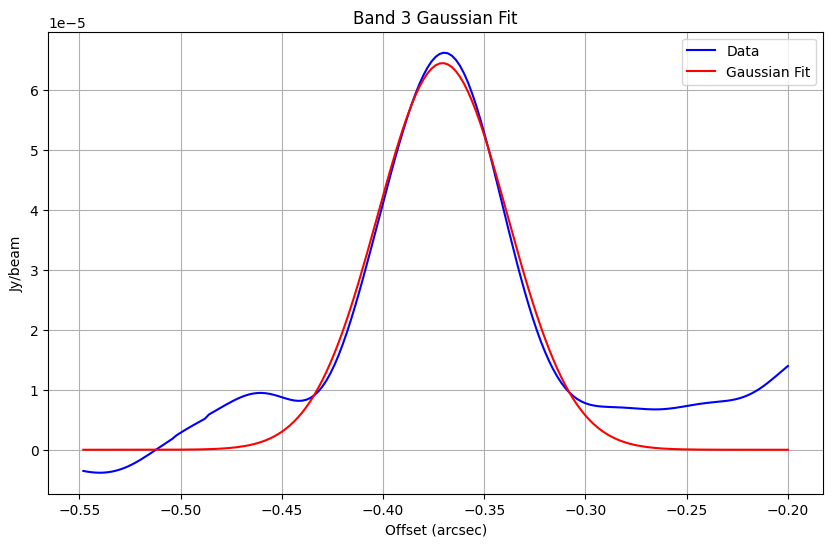

Band 4: FWHM = 0.071, FWZI = 0.151


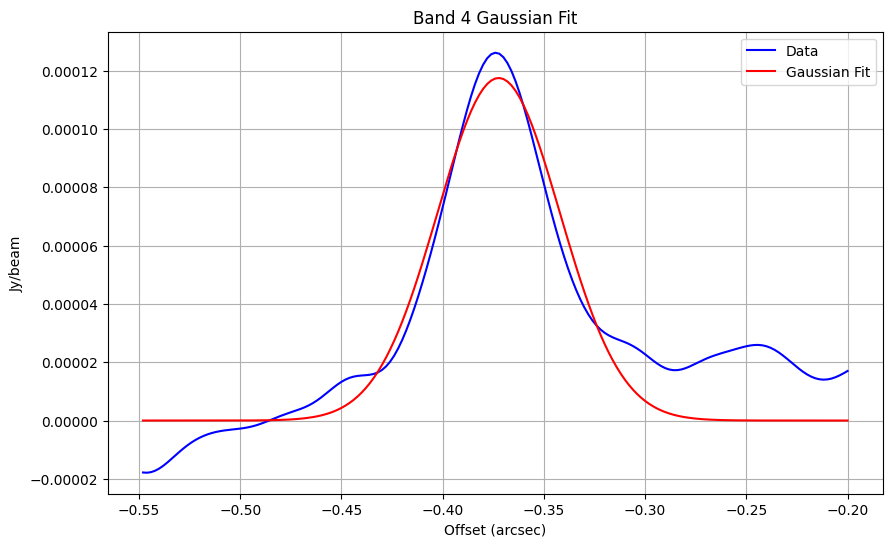

Band 5: FWHM = 0.056, FWZI = 0.118


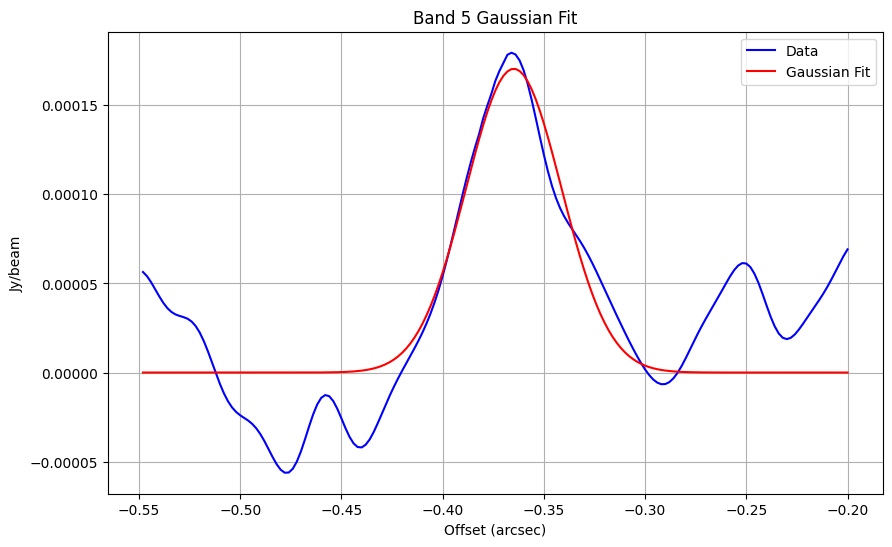

Band 6: FWHM = 0.091, FWZI = 0.193


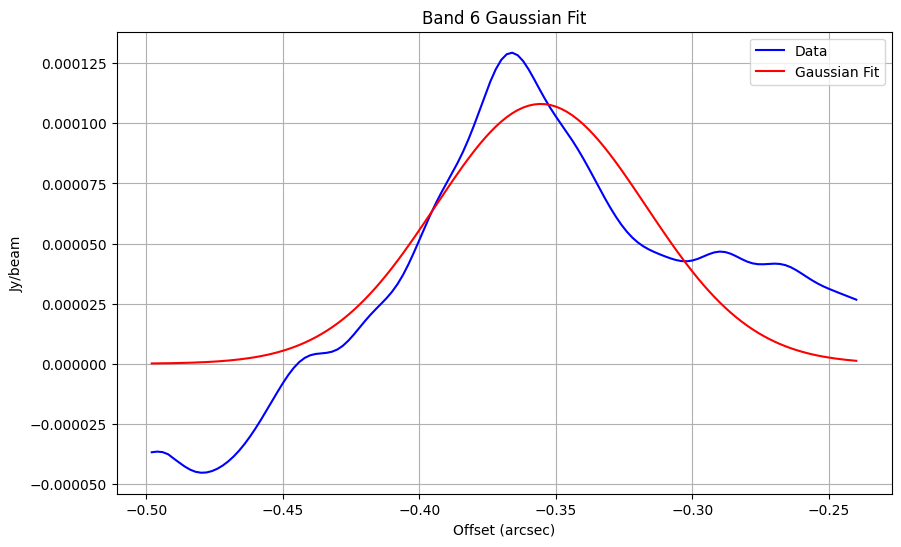

Band 7: FWHM = 0.121, FWZI = 0.257


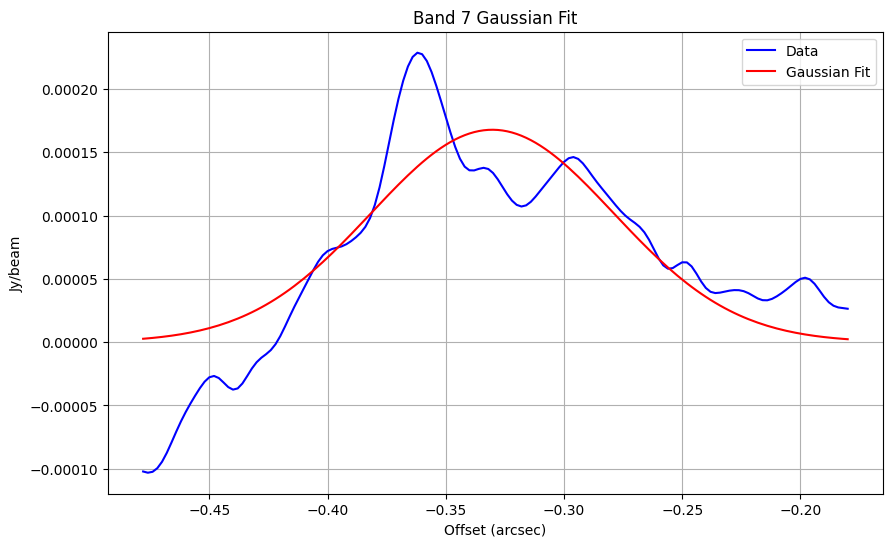

Band 8: FWHM = 0.077, FWZI = 0.164


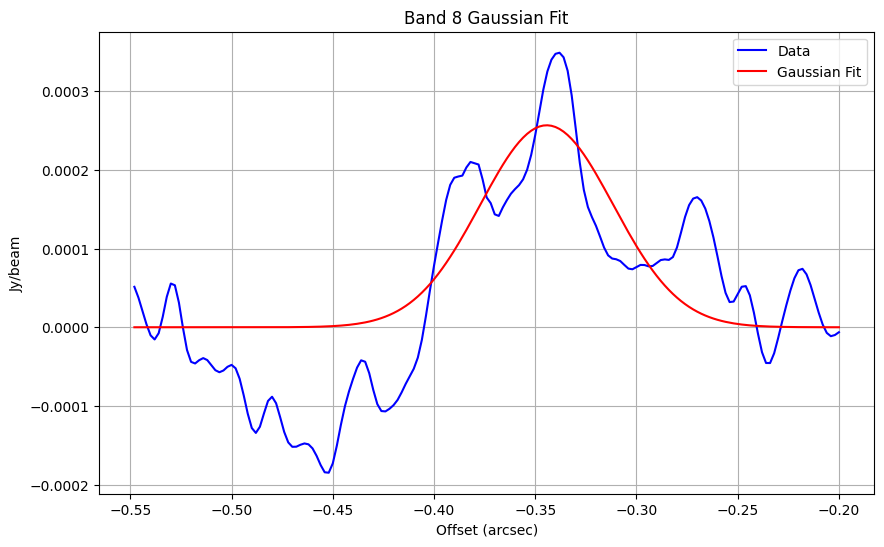

Band 9: FWHM = 0.067, FWZI = 0.143


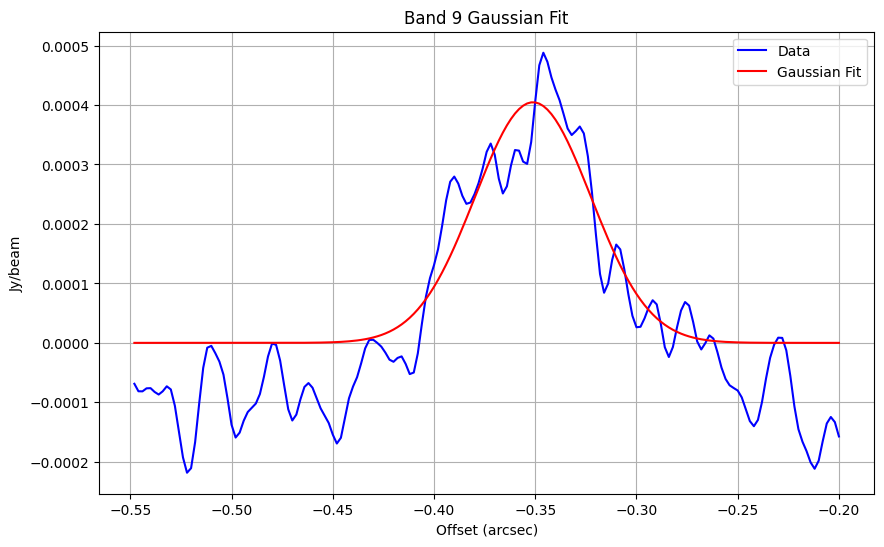

Band 10: FWHM = 0.092, FWZI = 0.196


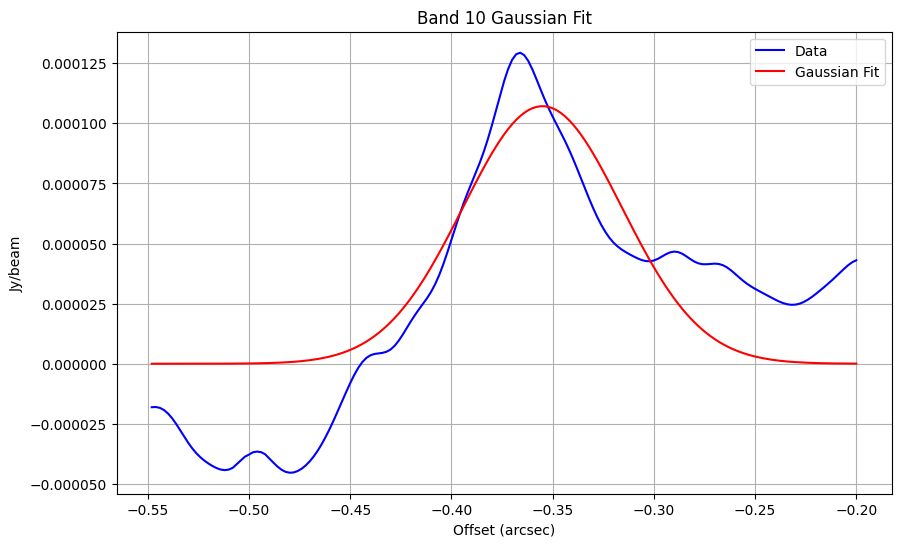


Summary of FWHM and FWZI for all bands:
Band 3: FWHM = 0.075, FWZI = 0.160
Band 4: FWHM = 0.071, FWZI = 0.151
Band 5: FWHM = 0.056, FWZI = 0.118
Band 6: FWHM = 0.091, FWZI = 0.193
Band 7: FWHM = 0.121, FWZI = 0.257
Band 8: FWHM = 0.077, FWZI = 0.164
Band 9: FWHM = 0.067, FWZI = 0.143
Band 10: FWHM = 0.092, FWZI = 0.196


In [54]:
# Define a dictionary to store FWHM and FWZI for each band
widths = {}

# Process Band 3
x3, y3 = extract_cpd_area(df_b3_36000_pwv1_c10, lower_bound=-55, upper_bound=-20)
params3,covar3 = fit_gaussian(x3, y3)
fwhm3, fwzi3 = calculate_widths(params3)
widths[3] = {'FWHM': fwhm3, 'FWZI': fwzi3}
print(f"Band 3: FWHM = {fwhm3:.3f}, FWZI = {fwzi3:.3f}")
plot_gaussian_fit(x3, y3, params3, Band=3)

# Process Band 4
x4, y4 = extract_cpd_area(df_b4_36000_pwv1_c10, lower_bound=-55, upper_bound=-20)
params4,covar4 = fit_gaussian(x4, y4)
fwhm4, fwzi4 = calculate_widths(params4)
widths[4] = {'FWHM': fwhm4, 'FWZI': fwzi4}
print(f"Band 4: FWHM = {fwhm4:.3f}, FWZI = {fwzi4:.3f}")
plot_gaussian_fit(x4, y4, params4, Band=4)

# Process Band 5
x5, y5 = extract_cpd_area(df_b5_36000_pwv1_c10, lower_bound=-55, upper_bound=-20)
params5,covar5 = fit_gaussian(x5, y5)
fwhm5, fwzi5 = calculate_widths(params5)
widths[5] = {'FWHM': fwhm5, 'FWZI': fwzi5}
print(f"Band 5: FWHM = {fwhm5:.3f}, FWZI = {fwzi5:.3f}")
plot_gaussian_fit(x5, y5, params5, Band=5)

# Process Band 6
x6, y6 = extract_cpd_area(df_b6_36000_pwv1_c10, lower_bound=-50, upper_bound=-24)
params6,covar6 = fit_gaussian(x6, y6)
fwhm6, fwzi6 = calculate_widths(params6)
widths[6] = {'FWHM': fwhm6, 'FWZI': fwzi6}
print(f"Band 6: FWHM = {fwhm6:.3f}, FWZI = {fwzi6:.3f}")
plot_gaussian_fit(x6, y6, params6, Band=6)

# Process Band 7
x7, y7 = extract_cpd_area(df_b7_36000_pwv1_c10, lower_bound=-48, upper_bound=-18)
params7,covar7 = fit_gaussian(x7, y7)
fwhm7, fwzi7 = calculate_widths(params7)
widths[7] = {'FWHM': fwhm7, 'FWZI': fwzi7}
print(f"Band 7: FWHM = {fwhm7:.3f}, FWZI = {fwzi7:.3f}")
plot_gaussian_fit(x7, y7, params7, Band=7)

# Process Band 8
x8, y8 = extract_cpd_area(df_b8_36000_pwv1_c10, lower_bound=-55, upper_bound=-20)
params8,covar8 = fit_gaussian(x8, y8)
fwhm8, fwzi8 = calculate_widths(params8)
widths[8] = {'FWHM': fwhm8, 'FWZI': fwzi8}
print(f"Band 8: FWHM = {fwhm8:.3f}, FWZI = {fwzi8:.3f}")
plot_gaussian_fit(x8, y8, params8, Band=8)

# Process Band 9
x9, y9 = extract_cpd_area(df_b9_36000_pwv1_c10, lower_bound=-55, upper_bound=-20)
params9,covar9 = fit_gaussian(x9, y9)
fwhm9, fwzi9 = calculate_widths(params9)
widths[9] = {'FWHM': fwhm9, 'FWZI': fwzi9}
print(f"Band 9: FWHM = {fwhm9:.3f}, FWZI = {fwzi9:.3f}")
plot_gaussian_fit(x9, y9, params9, Band=9)

# Process Band 10
x10, y10 = extract_cpd_area(df_b10_36000_pwv1_c10, lower_bound=-55, upper_bound=-20)
params10,covar10 = fit_gaussian(x10, y10)
fwhm10, fwzi10 = calculate_widths(params10)
widths[10] = {'FWHM': fwhm10, 'FWZI': fwzi10}
print(f"Band 10: FWHM = {fwhm10:.3f}, FWZI = {fwzi10:.3f}")
plot_gaussian_fit(x10, y10, params10, Band=10)

# Print all FWHM and FWZI values
print("\nSummary of FWHM and FWZI for all bands:")
for band, values in widths.items():
    print(f"Band {band}: FWHM = {values['FWHM']:.3f}, FWZI = {values['FWZI']:.3f}")



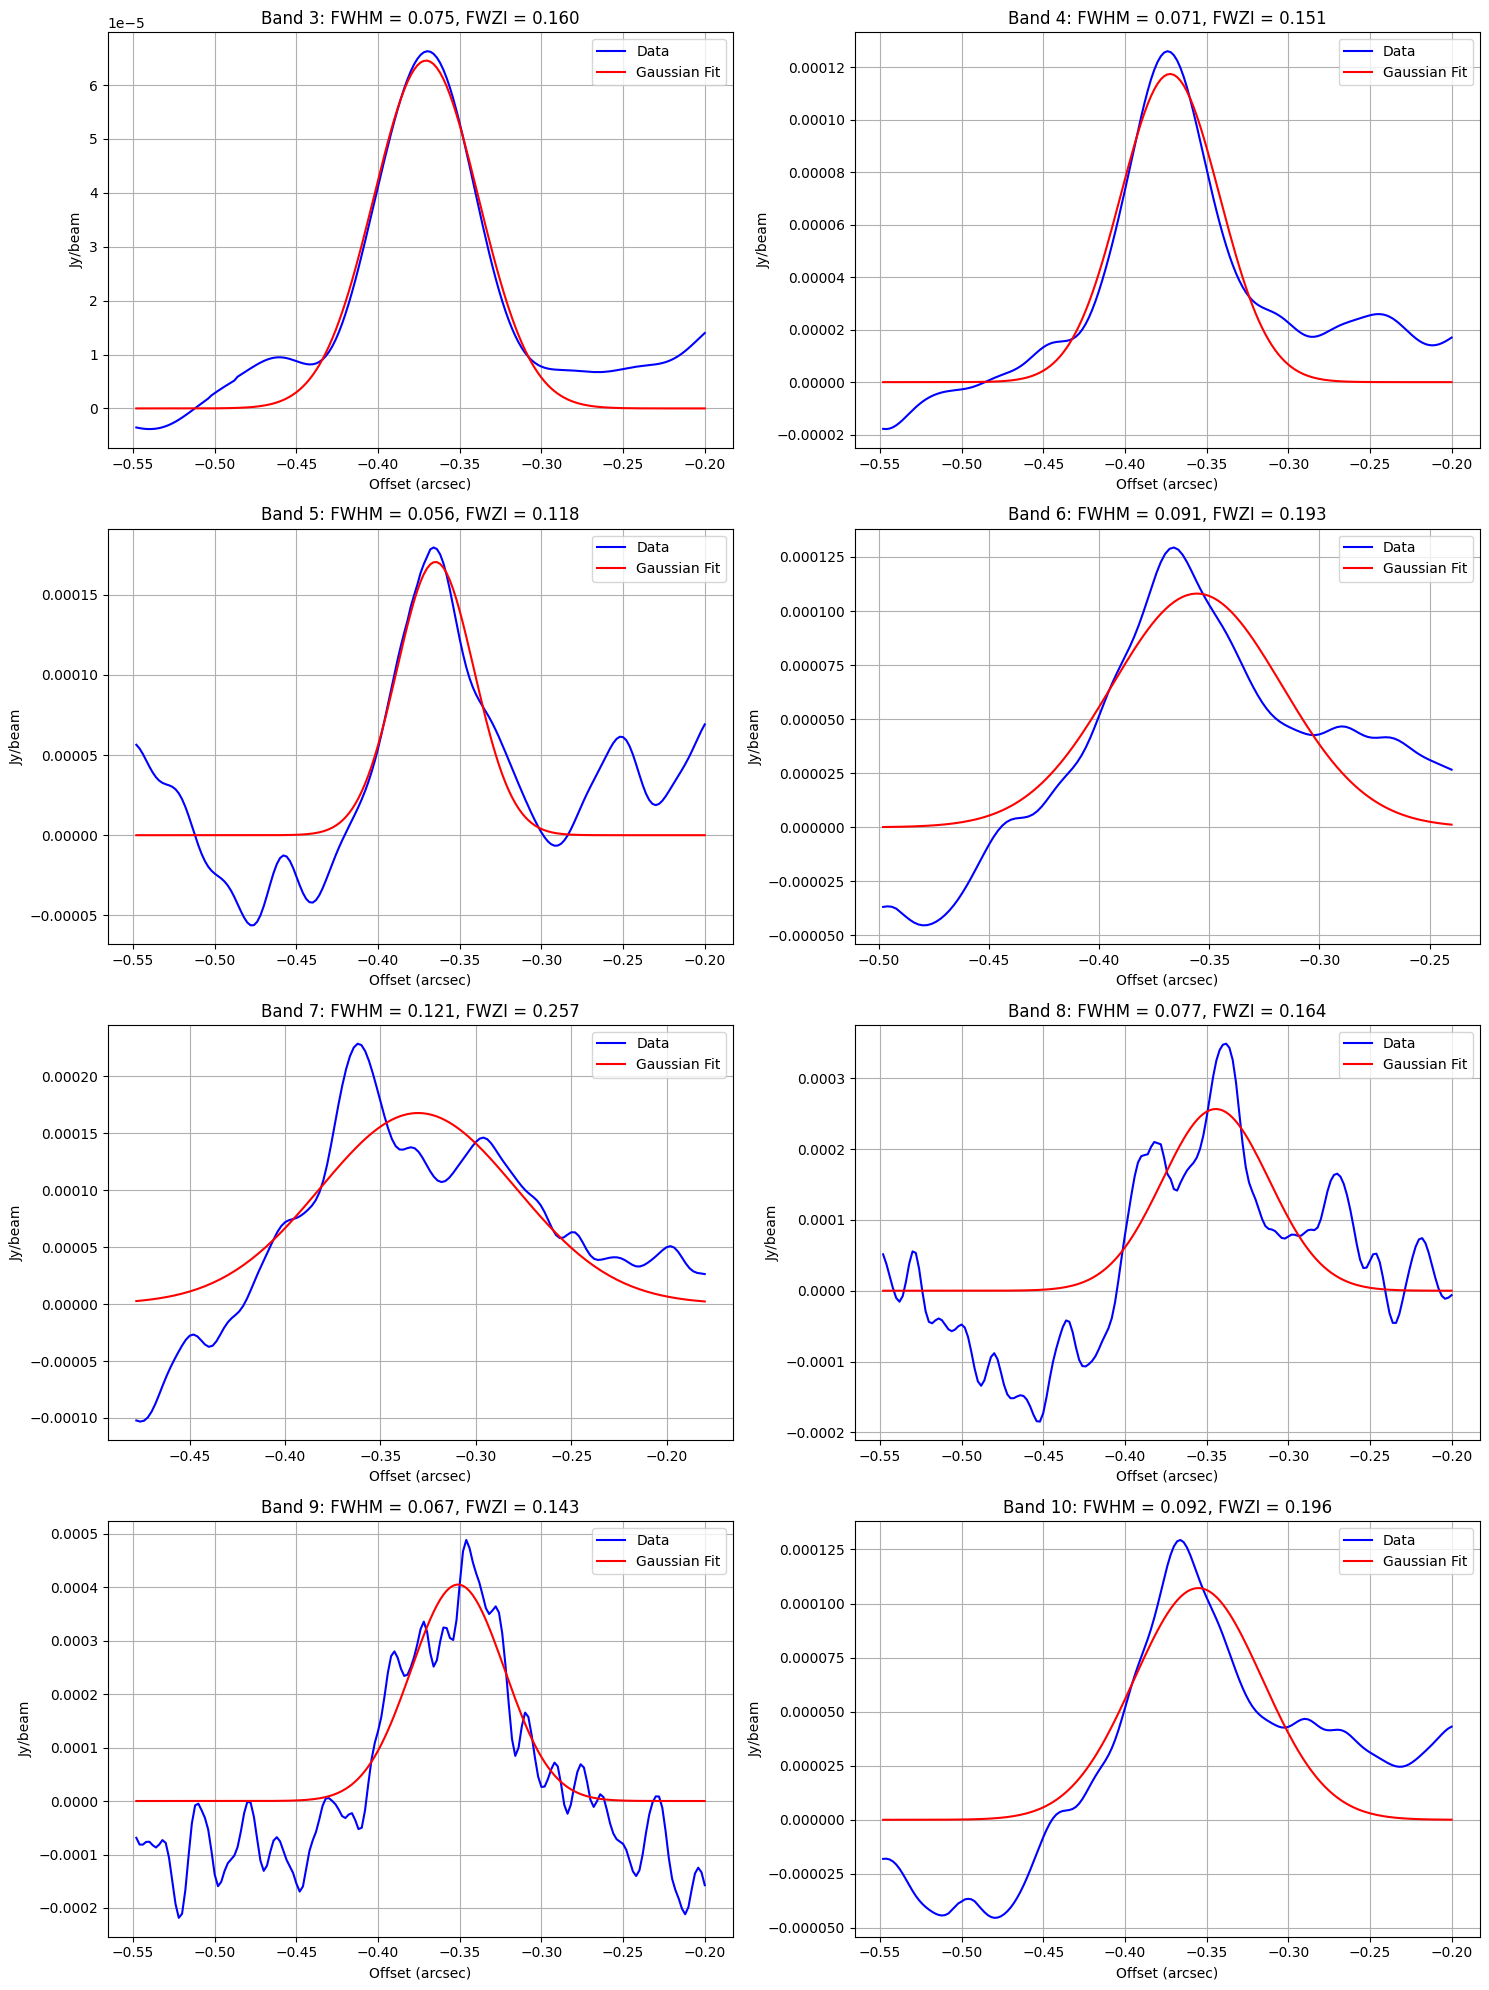

In [55]:
# Create a figure with subplots for all bands
fig, axes = plt.subplots(4, 2, figsize=(15, 20))  # 4 rows, 2 columns for 8 bands
axes = axes.flatten()  # Flatten the axes array for easier indexing

# Data for plotting (replace these with your actual extracted data and parameters)
bands = [3, 4, 5, 6, 7, 8, 9, 10]
x_data_list = [x3, x4, x5, x6, x7, x8, x9, x10]  # Replace with your x data for each band
y_data_list = [y3, y4, y5, y6, y7, y8, y9, y10]  # Replace with your y data for each band
params_list = [params3, params4, params5, params6, params7, params8, params9, params10]  # Gaussian fit parameters
fwhm_list = [fwhm3, fwhm4, fwhm5, fwhm6, fwhm7, fwhm8, fwhm9, fwhm10]  # FWHM values
fwzi_list = [fwzi3, fwzi4, fwzi5, fwzi6, fwzi7, fwzi8, fwzi9, fwzi10]  # FWZI values

# Loop through each band and plot in a subplot
for i, (band, x, y, params, fwhm, fwzi) in enumerate(zip(bands, x_data_list, y_data_list, params_list, fwhm_list, fwzi_list)):
    ax = axes[i]
    ax.plot(x, y, 'b-', label='Data')
    ax.plot(x, gaussian(x, *params), 'r-', label='Gaussian Fit')
    ax.set_title(f'Band {band}: FWHM = {fwhm:.3f}, FWZI = {fwzi:.3f}')
    ax.set_xlabel('Offset (arcsec)')
    ax.set_ylabel('Jy/beam')
    ax.legend()
    ax.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In [56]:
print(f'I think gaussian is better for lower band frequencies,')
print(f'I think the uncertainty in FWHM and FWZI comes from the uncertainty in standdard deviation. \nI assume the uncertainty from the actual SNR rms of the image will be contributing more \nthan the uncertainty of the gaussian fit, As it alters the peak of the guassian fit.')

I think gaussian is better for lower band frequencies,
I think the uncertainty in FWHM and FWZI comes from the uncertainty in standdard deviation. 
I assume the uncertainty from the actual SNR rms of the image will be contributing more 
than the uncertainty of the gaussian fit, As it alters the peak of the guassian fit.


### Estimating Error in FWHM from RMS Noise

The uncertainty in the Full Width at Half Maximum (FWHM) of a Gaussian profile can be estimated as:

$$
\delta \text{FWHM} \approx \frac{\text{FWHM}}{\text{SNR} \cdot \sqrt{8 \ln 2}}
$$

Where:
- **FWHM** is the full width at half maximum of the fitted Gaussian
- **SNR** is the signal-to-noise ratio = peak amplitude / RMS noise
This can be derived from the uncertainty propagartion


In [57]:
# Signal to Noise ratio of each image in 36000 pwv=1

# peak CPD signal
peak_cpd = [] # Jy/beam

noise = [] # Jy/beam

snr = [] 

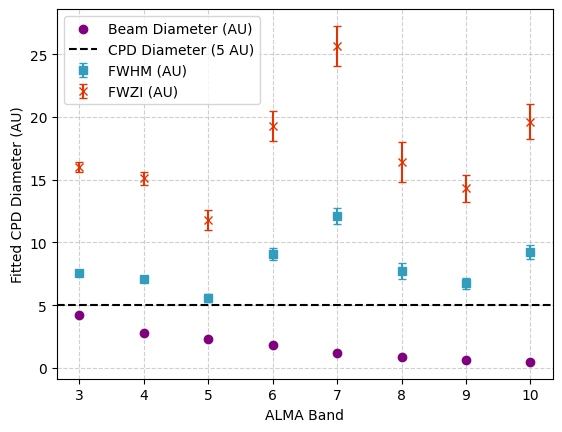

In [58]:
# FWHM And FWZI to CPD radius 
# FWZI = 6 sigma, FWHM = 2.355 sigma
# Add noise to them : URGHHGHGHGHGHG

sigma = np.array([8.96E-06, 2.04E-05, 4.28E-05, 4.28E-05, 4.02E-05, 6.03E-05, 8.96E-05, 1.91E-04])
peak = np.array([6.74E-05, 1.28E-04, 1.84E-04, 1.32E-04, 2.36E-04, 4.70E-04, 6.20E-04, 9.31E-04])
snr = np.array([7.521910592, 6.285387241, 4.311795881, 3.07841458, 5.866709171, 7.801206583, 6.913285837, 4.874755034])
sigma_fit = sigma /snr 
#err_FWHM = 2*(2*np.log(2))**0.5 * sigma_fit
#err_FWZI = 6 * sigma_fit

beam_di =[4.2,2.8,2.3,1.8 ,1.2,0.91 ,0.65,0.48] #au
# Initialize arrays to store errors for each band
err_sigma_fit_list = []  # To store errors on sigma_fit
err_FWHM_list = []       # To store errors on FWHM
err_FWZI_list = []       # To store errors on FWZI

# Iterate over covariance matrices for each band
for covar in [covar3, covar4, covar5, covar6, covar7, covar8, covar9, covar10]:  # Replace with actual covariance matrices
    # Extract the error on sigma (standard deviation)
    err_sigma_fit = np.sqrt(covar[2, 2])  # Error on sigma (stddev)
    err_sigma_fit_list.append(err_sigma_fit)
    
    # Calculate errors for FWHM and FWZI
    err_FWHM = 2 * (2 * np.log(2))**0.5 * err_sigma_fit
    err_FWZI = 6 * err_sigma_fit
    
    # Store the errors
    err_FWHM_list.append(err_FWHM)
    err_FWZI_list.append(err_FWZI)

# Convert lists to numpy arrays for easier manipulation
err_sigma_fit_array = np.array(err_sigma_fit_list)
err_FWHM_array = np.array(err_FWHM_list)
err_FWZI_array = np.array(err_FWZI_list)

plt.figure()
#plt.title('FWHM and FWZI vs Band')
#plt.plot(bands, [fwhm*100 for fwhm in fwhm_list], 'o', label='FWHM (AU)', color='#339dbd')
#plt.plot(bands, [fwzi*100 for fwzi in fwzi_list], 'o', label='FWZI (AU)', color='#e33302')

plt.errorbar(bands, [fwhm * 100 for fwhm in fwhm_list], yerr=[err * 100 for err in err_FWHM_array ], 
             fmt='s', label='FWHM (AU)', color='#339dbd', capsize=3)
plt.errorbar(bands, [fwzi * 100 for fwzi in fwzi_list], yerr=[err * 100 for err in err_FWZI_array], 
             fmt='x', label='FWZI (AU)', color='#e33302', capsize=3)

plt.scatter(bands, beam_di, color='purple', label='Beam Diameter (AU)', zorder=5)

plt.xlabel('ALMA Band')
plt.ylabel('Fitted CPD Diameter (AU)')

plt.axhline(y=5, color='k', linestyle='--',label='CPD Diameter (5 AU)')

plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(bands)  # Force exact band values
  # Add space above top value


plt.xticks(bands)
plt.grid(True)
plt.legend()
plt.show()

C:\Users\LHEM\AppData\Local\Temp\ipykernel_20896\722293965.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('coolwarm', len(bands))  # Get N evenly spaced colors


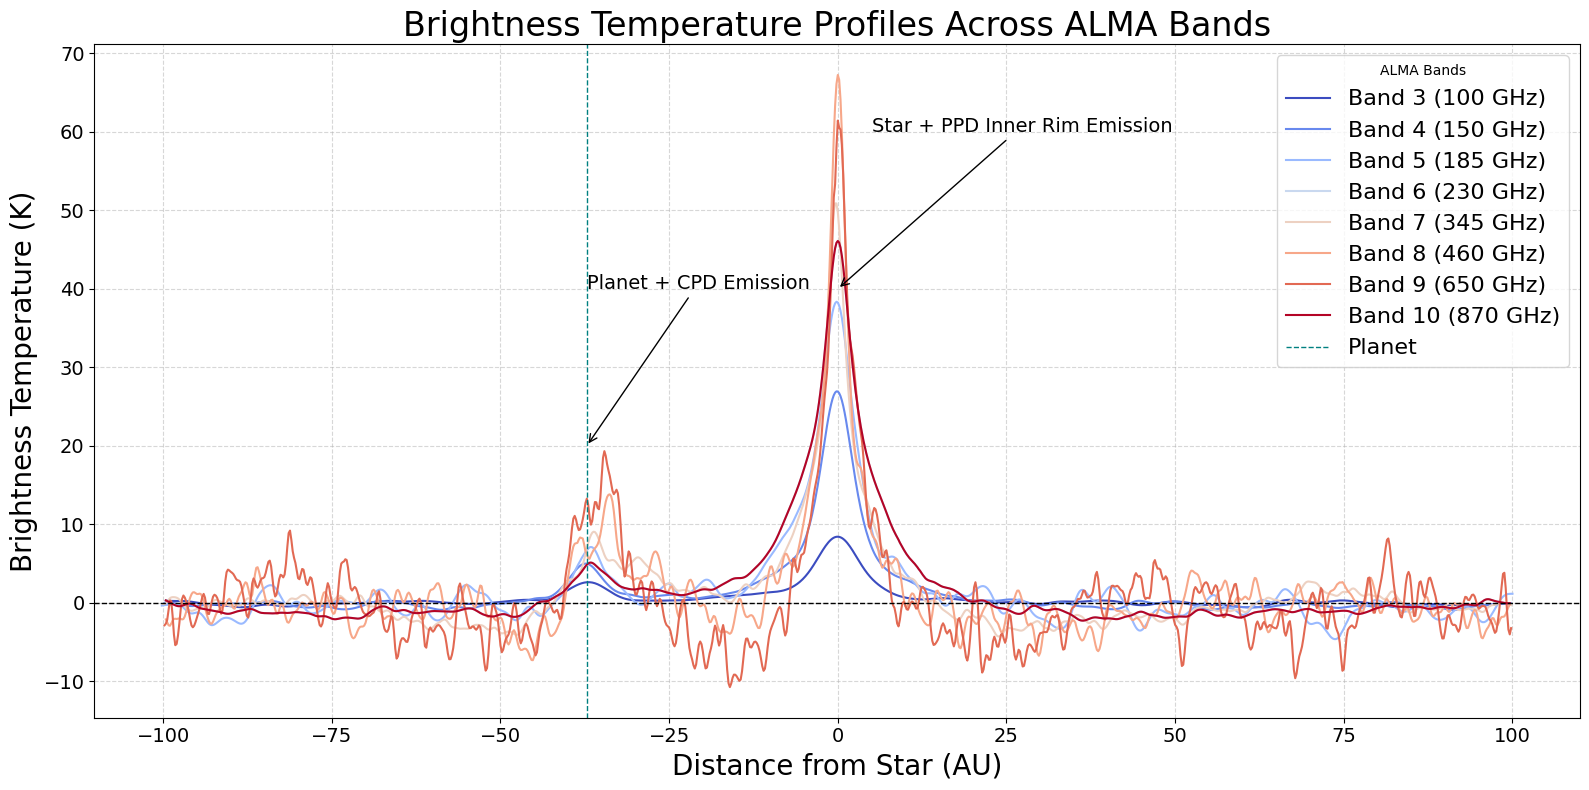

In [63]:
# --- Beam sizes (major and minor axis in arcsec) from back to front (C7 to C10) ---
bmax = [0.0631084, 0.0420876, 0.0341, 0.0274488, 0.0183006, 0.0137131, 0.00970403, 0.0071786]
bmin = [0.0489144, 0.0326125, 0.0264468, 0.0212668, 0.0141719, 0.0106343, 0.00752852, 0.00568032]

# --- Frequencies corresponding to ALMA Bands 3 to 10 ---
frequencies = np.array([100, 150, 185, 230, 345, 460, 650, 870])  # in GHz

# --- Define brightness temperature conversion function ---
def brightness_temperature(I_jy, nu_GHz, theta_maj_arcsec, theta_min_arcsec):
    I_mJy = I_jy * 1000.0
    T_b = (1.222e3 * I_mJy) / (nu_GHz**2 * theta_maj_arcsec * theta_min_arcsec)
    return T_b


# Choose a colormap — options: viridis, plasma, inferno, magma, cividis, turbo, etc.
cmap = cm.get_cmap('coolwarm', len(bands))  # Get N evenly spaced colors

plt.figure(figsize=(16, 8))  # Set figure size

for i, (band, df) in enumerate(zip(bands, dfs)):
    color = cmap(i)  # Get the i-th color from the colormap
    T_brightness = brightness_temperature(df['Jy/beam'], frequencies[i], bmax[i], bmin[i])
    radii_au = df['Offset'] * 100  # Convert arcsec to AU (assuming 100 AU per arcsec)
    
    plt.plot(radii_au, T_brightness, label=f'Band {band} ({frequencies[i]} GHz)', color=color)

# --- Add annotations ---
plt.annotate(
    'Planet + CPD Emission', 
    xy=(-37.2, 20),  # Coordinates of the arrow tip
    xytext=(-37.2, 40),  # Coordinates of the text
    arrowprops=dict(facecolor='black', arrowstyle='->'), 
    fontsize=14
)

plt.annotate(
    'Star + PPD Inner Rim Emission', 
    xy=(0, 40),  # Coordinates of the arrow tip
    xytext=(5, 60),  # Coordinates of the text
    arrowprops=dict(facecolor='black', arrowstyle='->'), 
    fontsize=14
)

# --- Final plot formatting ---
plt.xlabel('Distance from Star (AU)', fontsize=20)
plt.ylabel('Brightness Temperature (K)', fontsize=20)
plt.title('Brightness Temperature Profiles Across ALMA Bands', fontsize=24)

# Increase tick label font size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.grid(True, ls='--', alpha=0.5)
plt.axhline(y=0, color='k', linestyle='--', linewidth=1)  # Add horizontal line at y=0
plt.axvline(x=-37.2, color='teal', linestyle='--', linewidth=1, label='Planet')  # Add vertical line at x=-37.2

plt.legend(title="ALMA Bands", fontsize=16, loc='upper right')
plt.tight_layout()
plt.show()

C:\Users\LHEM\AppData\Local\Temp\ipykernel_20896\3859943791.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('coolwarm', len(bands))  # Colormap for consistent colors


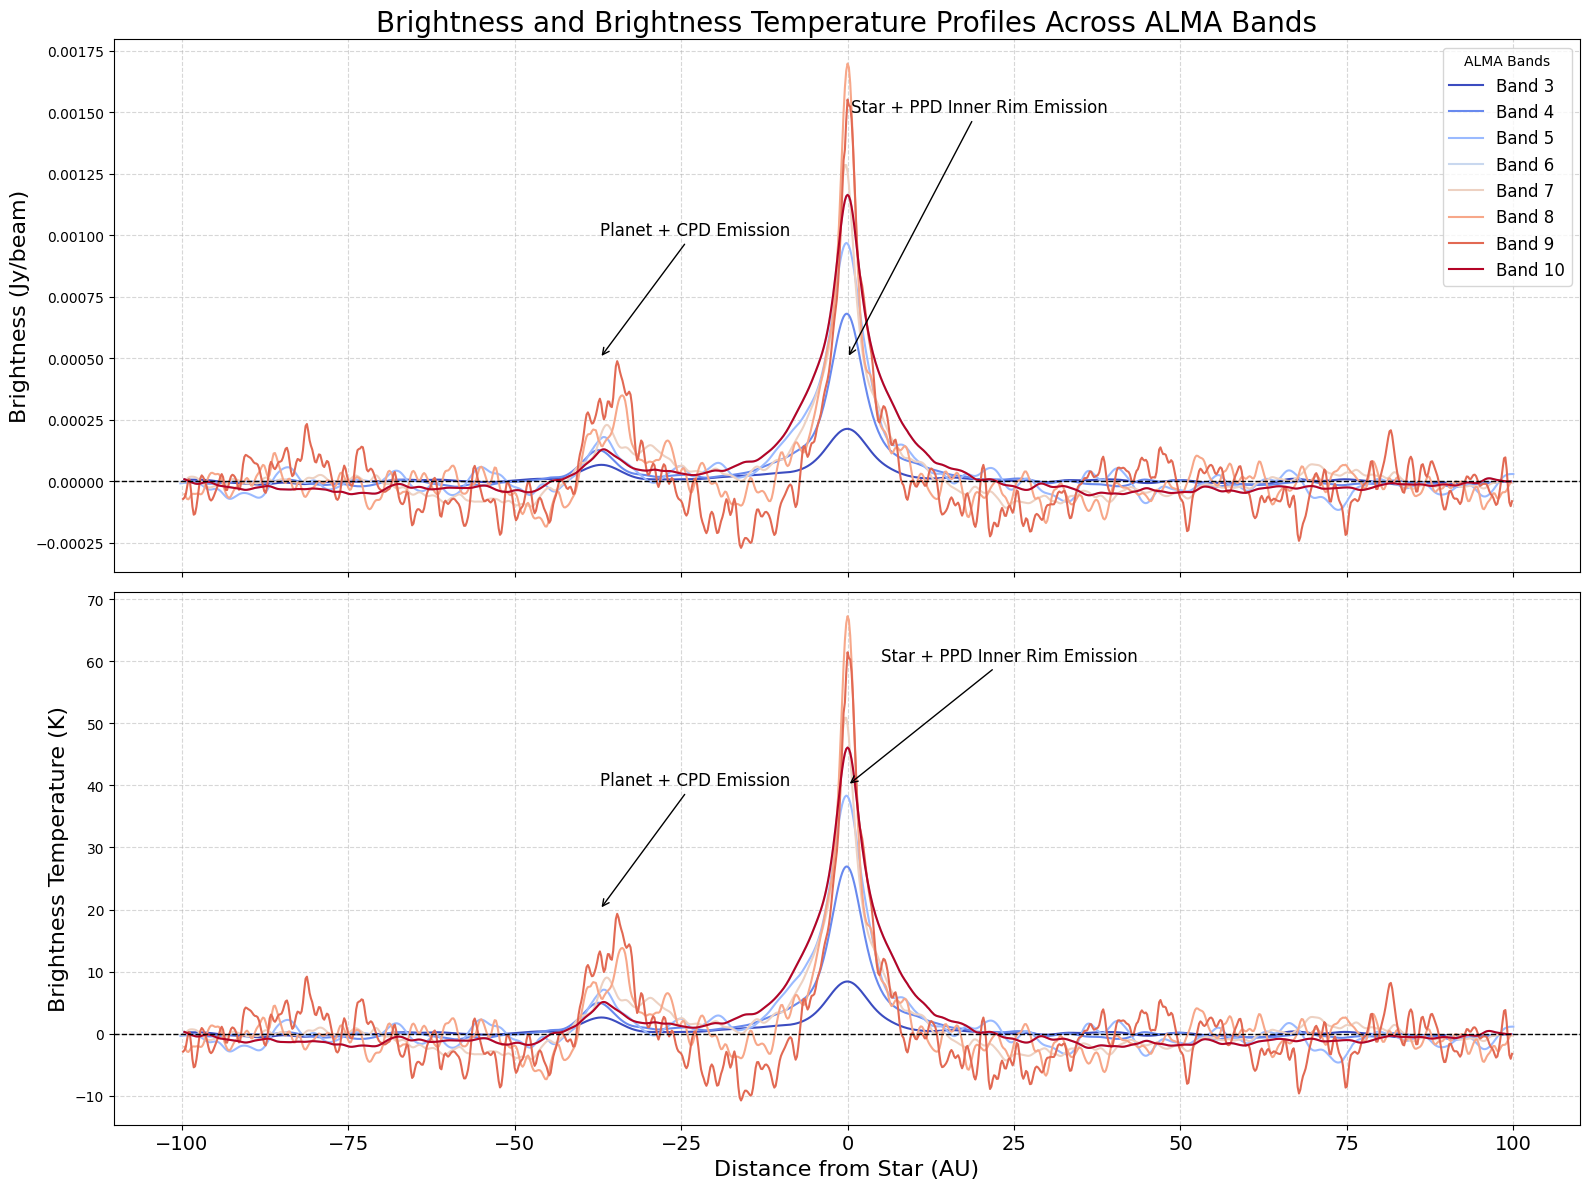

In [64]:
# --- Create subplots ---
fig, axes = plt.subplots(2, 1, figsize=(16, 12), sharex=True)  # Two panels, shared x-axis
cmap = cm.get_cmap('coolwarm', len(bands))  # Colormap for consistent colors

# --- Upper Panel: Brightness (Jy/beam) ---
for i, (band, df) in enumerate(zip(bands, dfs)):
    color = cmap(i)  # Get the i-th color from the colormap
    radii_au = df['Offset'] * 100  # Convert arcsec to AU (assuming 100 AU per arcsec)
    axes[0].plot(radii_au, df['Jy/beam'], label=f'Band {band}', color=color)

axes[0].set_ylabel('Brightness (Jy/beam)', fontsize=16)
axes[0].set_title('Brightness and Brightness Temperature Profiles Across ALMA Bands', fontsize=20)
axes[0].legend(title="ALMA Bands", fontsize=12, loc='upper right')
axes[0].grid(True, ls='--', alpha=0.5)
axes[0].axhline(y=0, color='k', linestyle='--', linewidth=1)  # Horizontal line at y=0
axes[0].annotate(
    'Planet + CPD Emission', 
    xy=(-37.2, 0.0005),  # Coordinates of the arrow tip
    xytext=(-37.2, 0.001),  # Coordinates of the text
    arrowprops=dict(facecolor='black', arrowstyle='->'), 
    fontsize=12
)
axes[0].annotate(
    'Star + PPD Inner Rim Emission', 
    xy=(0, 0.0005),  # Coordinates of the arrow tip
    xytext=(0.5, 0.0015),  # Coordinates of the text
    arrowprops=dict(facecolor='black', arrowstyle='->'), 
    fontsize=12
)

# --- Lower Panel: Brightness Temperature (K) ---
for i, (band, df) in enumerate(zip(bands, dfs)):
    color = cmap(i)  # Get the i-th color from the colormap
    T_brightness = brightness_temperature(df['Jy/beam'], frequencies[i], bmax[i], bmin[i])
    radii_au = df['Offset'] * 100  # Convert arcsec to AU (assuming 100 AU per arcsec)
    axes[1].plot(radii_au, T_brightness, label=f'Band {band}', color=color)

axes[1].set_xlabel('Distance from Star (AU)', fontsize=16)
axes[1].set_ylabel('Brightness Temperature (K)', fontsize=16)
axes[1].grid(True, ls='--', alpha=0.5)
axes[1].axhline(y=0, color='k', linestyle='--', linewidth=1)  # Horizontal line at y=0
axes[1].annotate(
    'Planet + CPD Emission', 
    xy=(-37.2, 20),  # Coordinates of the arrow tip
    xytext=(-37.2, 40),  # Coordinates of the text
    arrowprops=dict(facecolor='black', arrowstyle='->'), 
    fontsize=12
)
axes[1].annotate(
    'Star + PPD Inner Rim Emission', 
    xy=(0, 40),  # Coordinates of the arrow tip
    xytext=(5, 60),  # Coordinates of the text
    arrowprops=dict(facecolor='black', arrowstyle='->'), 
    fontsize=12
)

# --- Final Formatting ---
plt.xticks(fontsize=14)
plt.tight_layout()
plt.show()

C:\Users\LHEM\AppData\Local\Temp\ipykernel_20896\4035924085.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('coolwarm', len(bands))


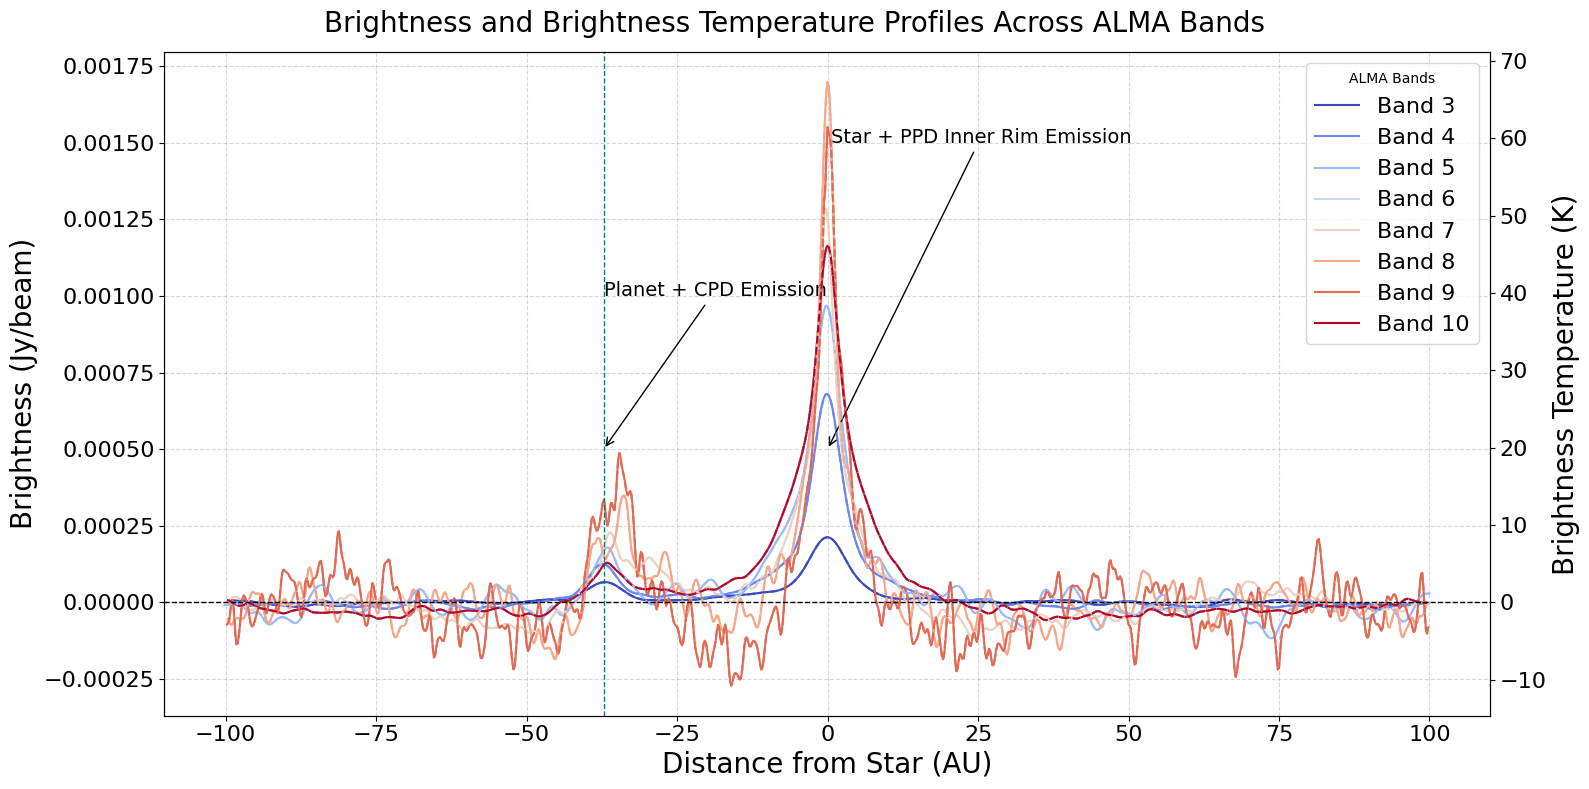

In [72]:
# --- Create the plot ---
fig, ax1 = plt.subplots(figsize=(16, 8))  # Create a single plot with shared x-axis

# Colormap for consistent colors
cmap = cm.get_cmap('coolwarm', len(bands))

# --- Plot Brightness (Jy/beam) on the left y-axis ---
for i, (band, df) in enumerate(zip(bands, dfs)):
    color = cmap(i)  # Get the i-th color from the colormap
    radii_au = df['Offset'] * 100  # Convert arcsec to AU (assuming 100 AU per arcsec)
    ax1.plot(radii_au, df['Jy/beam'], label=f'Band {band}', color=color)

ax1.set_xlabel('Distance from Star (AU)', fontsize=20)
ax1.set_ylabel('Brightness (Jy/beam)', fontsize=20, color='black')
ax1.tick_params(axis='y', labelcolor='black')  # Set tick color
ax1.tick_params(axis='both', which='major', labelsize=16)
ax1.grid(True, ls='--', alpha=0.5)

# --- Add annotations ---
ax1.annotate(
    'Planet + CPD Emission', 
    xy=(-37.2, 0.0005),  # Coordinates of the arrow tip
    xytext=(-37.2, 0.001),  # Coordinates of the text
    arrowprops=dict(facecolor='black', arrowstyle='->'), 
    fontsize=14
)
ax1.annotate(
    'Star + PPD Inner Rim Emission', 
    xy=(0, 0.0005),  # Coordinates of the arrow tip
    xytext=(0.5, 0.0015),  # Coordinates of the text
    arrowprops=dict(facecolor='black', arrowstyle='->'), 
    fontsize=14
)

# --- Plot Brightness Temperature (K) on the right y-axis ---
ax2 = ax1.twinx()  # Create a second y-axis sharing the same x-axis
for i, (band, df) in enumerate(zip(bands, dfs)):
    color = cmap(i)  # Use the same color for consistency
    T_brightness = brightness_temperature(df['Jy/beam'], frequencies[i], bmax[i], bmin[i])
    radii_au = df['Offset'] * 100  # Convert arcsec to AU (assuming 100 AU per arcsec)
    ax2.plot(radii_au, T_brightness, linestyle='--', color=color)

ax2.set_ylabel('Brightness Temperature (K)', fontsize=20, color='black')
ax2.tick_params(axis='y', labelcolor='black')  # Set tick color
ax2.tick_params(axis='both', which='major', labelsize=16) 

plt.axhline(y=0, color='k', linestyle='--', linewidth=1)  # Add horizontal line at y=0
plt.axvline(x=-37.2, color='teal', linestyle='--', linewidth=1, label='planet')  # Add vertical line at x=0

# --- Final Formatting ---
fig.suptitle('Brightness and Brightness Temperature Profiles Across ALMA Bands', fontsize=20)
ax1.legend(title="ALMA Bands", fontsize=16, loc='upper right')
plt.tight_layout()
plt.show()